# Data Projekt 2 Team_xmisti00


This program is specified for data analyzation and preparation for mining algorithms. It is used for data cleaning, data transformation, data reduction and data visualization. Dataset IT Salary Survey EU  2020.csv is analyzed and its analyzed outputs are in ./img as *.pdf outputs, and in ./analyzedData as *.csv outputs.
After analyzation, 2 versions of data set are created, both is for data mining algorithms of salary prediction. One is composed only of numerical values, the other is composed only of categorical values.
Final output is in ./predicitonData as numericalDataSet.csv and CategoricalDataSet.csv. 

In [84]:
__authors__ = "Matej Mištík, Ľuboš Bever, Jakub Richtárik"
__version__ = "1.0"
__maintainer__ = "Matej Mištík"
__email__ = "xmisti00@stud.vutbr.cz"

# Load and Show data set

In [85]:
# Path: main.ipynb
# coding=utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy import stats
from pathlib import Path

# create folder if it doesn't exist
Path("./analyzedData").mkdir(parents=True, exist_ok=True)
Path("./img").mkdir(parents=True, exist_ok=True)
Path("./textoutputs").mkdir(parents=True, exist_ok=True)
Path("./MiningReadyData").mkdir(parents=True, exist_ok=True)

pd.set_option('display.max_columns', None)


df = pd.read_csv('./dataSets/IT Salary Survey EU  2020.csv')

In [86]:
df.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR':'Salary',
'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'SalaryYearAgo',
'Number of vacation days':'VacationDays',
'Company size':'CompanySize',
'Company type':'CompanyType',
'Seniority level':'SeniorityLevel',
'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'ShortWeekHours',
'Total years of experience' : 'ExpierenceYears',
'Years of experience in Germany' : 'ExpierenceYearsGermany',
'Have you lost your job due to the coronavirus outbreak?' : 'LostJobDueToCorona',
'Position ' : 'Position', 'Annual bonus+stocks one year ago. Only answer if staying in same country' : 'StocksYearAgoSameCountry',
'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR' : 'CovidSupport'}, inplace=True)

In [87]:
df

,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


# Data Exploration

### prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

In [88]:
#Size of row x columns
df.shape

(1253, 23)

In [89]:
# datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1253 non-null   object 
 1   Age                                                     1226 non-null   float64
 2   Gender                                                  1243 non-null   object 
 3   City                                                    1253 non-null   object 
 4   Position                                                1247 non-null   object 
 5   ExpierenceYears                                         1237 non-null   object 
 6   ExpierenceYearsGermany                                  1221 non-null   object 
 7   SeniorityLevel                                          1241 non-null   object 
 8   Your main technology / programming lan

- Timestamp                                                                                                                -   datum a čas záznamu
- Age                                                                                                                      -   pomerny
- Gender                                                                                                                   -   Symetric binary
- City                                                                                                                     -   Nominal
- Position                                                                                                                 -   Nominal
- Total years of experience                                                                                                -   Pomerovy
- Years of experience in Germany                                                                                           -   Pomerovy / odstranitelny
- Seniority level                                                                                                          -   ordinal
- Your main technology / programming language                                                                              -   nominal
- Other technologies/programming languages you use often                                                                   -   nominal
- Yearly brutto salary (without bonus and stocks) in EUR                                                                   -   pomerovy
- Yearly bonus + stocks in EUR                                                                                             -   nominal
- Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country                 -   pomerovy
- Annual bonus+stocks one year ago. Only answer if staying in same country                                                 -   nominal
- Number of vacation days                                                                                                  -   pomerovy
- Employment status                                                                                                        -   ordinal
- Сontract duration                                                                                                        -   pomerovy
- Main language at work                                                                                                    -   nominal
- Company size                                                                                                             -   ordinal
- Company type                                                                                                             -   ordinal
- Have you lost your job due to the coronavirus outbreak?                                                                  -   nominal / odstranitelny
- Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week (ShortWeek)            -   pomerny
- Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR  -   pomerny

In [90]:
# find range of all columns for dataframe and create a output file for df.describe
df.describe().to_csv(Path('./analyzedData/df_describe.csv'))
df.describe()

,Age,Salary,SalaryYearAgo,ShortWeekHours
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [91]:
# show mode for all numerical columns
df.mode(numeric_only=True).to_csv(Path('./analyzedData/df_mode.csv'))
df.mode(numeric_only=True)

,Age,Salary,SalaryYearAgo,ShortWeekHours
0,30.0,60000.0,65000.0,0.0


In [92]:
df.describe(exclude='number').to_csv(Path('./analyzedData/df_describe_non_numeric.csv'))
df.describe(exclude='number')

,Timestamp,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Yearly bonus + stocks in EUR,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,CovidSupport
count,1253,1243,1253,1247,1237,1221,1241,1126,1096,829,614,1185,1236,1224,1237,1235,1228,1233,462
unique,1248,3,119,148,48,53,24,256,562,168,131,45,11,3,14,5,63,10,59
top,24/11/2020 13:55:19,Male,Berlin,Software Engineer,10,2,Senior,Java,Javascript / Typescript,0,0,30,Full-time employee,Unlimited contract,English,1000+,Product,No,0
freq,2,1049,681,387,138,195,565,184,44,227,200,488,1190,1159,1020,448,760,1162,161


In [93]:
# geometric mean of some numerical columns
dfGeo = df.copy()
dfGeo.dropna(axis=0, inplace=True)
geometric_mean = stats.gmean(dfGeo.loc[:,('SalaryYearAgo')]).round(2)
print(geometric_mean)
geometric_mean = stats.gmean(dfGeo.loc[:,('Age')], axis=0).round(2)
print(geometric_mean)

63817.0
32.81


In [94]:
# harmonic mean of some numerical columns
harmonic_mean = stats.hmean(dfGeo.loc[:,('SalaryYearAgo')]).round(2)
print(harmonic_mean)
harmonic_mean = stats.hmean(dfGeo.loc[:,('Age')], axis=0).round(2)
harmonic_mean

59905.52


32.45

In [95]:
# dataframe std
df.std(numeric_only=True, axis=0, ddof=0)

Age               5.661494e+00
Salary            2.823934e+09
SalaryYearAgo     1.679558e+07
ShortWeekHours    1.525468e+01
dtype: float64

In [96]:
# count values in all columns and show most used values descending
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------')

Timestamp
24/11/2020 13:55:19    2
25/11/2020 08:47:37    2
24/11/2020 15:07:35    2
25/11/2020 18:28:01    2
24/11/2020 14:07:23    2
                      ..
24/11/2020 20:26:58    1
24/11/2020 20:26:20    1
24/11/2020 20:26:19    1
24/11/2020 20:25:32    1
19/01/2021 12:01:11    1
Name: Timestamp, Length: 1248, dtype: int64
--------------------------------------
Age
30.0    110
33.0     94
32.0     94
28.0     87
31.0     87
29.0     86
35.0     82
34.0     74
36.0     60
26.0     59
27.0     58
38.0     48
37.0     44
25.0     42
40.0     31
24.0     28
39.0     28
42.0     20
41.0     14
23.0     12
45.0     11
43.0     10
22.0      8
44.0      8
46.0      8
48.0      4
47.0      3
56.0      2
49.0      2
54.0      2
66.0      1
53.0      1
65.0      1
59.0      1
50.0      1
51.0      1
21.0      1
20.0      1
69.0      1
52.0      1
Name: Age, dtype: int64
--------------------------------------
Gender
Male       1049
Female      192
Diverse       2
Name: Gender, dtype: int64
---

## Rozlozeni hodnot

 prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.).

### Age

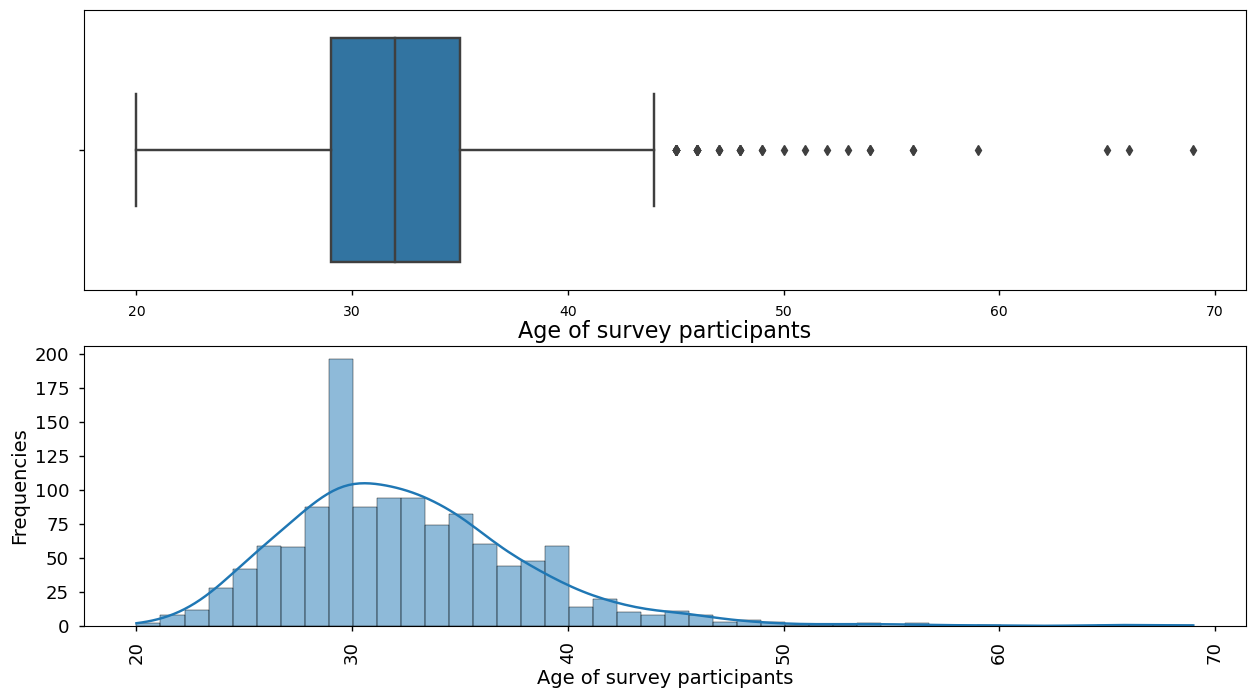

count    1226.000000
mean       32.509788
std         5.663804
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64


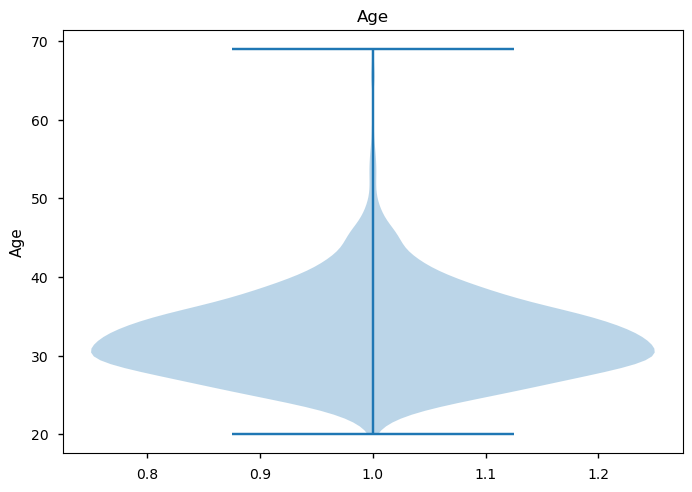

count    1186.000000
mean       31.937605
std         4.676666
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        44.000000
Name: Age, dtype: float64


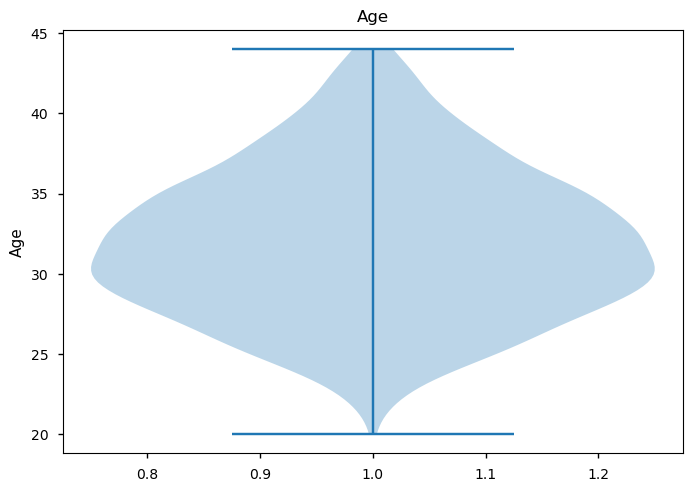

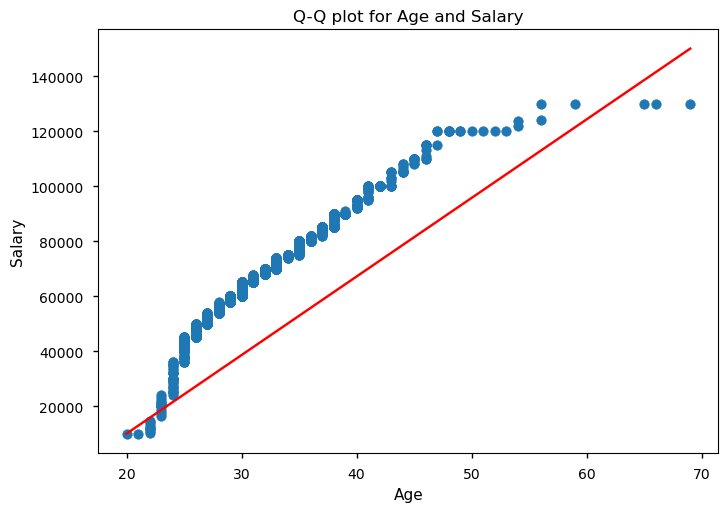

In [97]:
age = df['Age'].dropna()

fig, (ax_box,ax_hist) = plt.subplots(2,figsize=(15,8))

sns.boxplot(data=df,x='Age',ax=ax_box)
ax_box.set(xlabel="")
sns.histplot(data=df,x='Age',kde=True,ax=ax_hist)


plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequencies",fontsize=14)
plt.title("Age of survey participants",fontsize=16)
plt.savefig(Path('./img/age_histogram.pdf'))
plt.show()
plt.close()
print(age.describe())

plt.violinplot(age)
plt.title('Age')
plt.ylabel('Age')
plt.savefig(Path('./img/age_violin.pdf'))
plt.show()
plt.close()

Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)
IQR = Q3 - Q1

ageOUT = age[~((age < (Q1 - 1.5 * IQR)) |(age > (Q3 + 1.5 * IQR)))]
print(ageOUT.describe())

plt.violinplot(ageOUT)
plt.title('Age')
plt.ylabel('Age')
plt.show()
plt.close()

# create Q-Q plot for age and salary

plt.scatter(np.sort(df['Age']), np.sort(df['Salary']))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Q-Q plot for Age and Salary')
# add the line y=x
x = np.array([df['Age'].min(), df['Age'].max()])
y = np.array([df['Salary'].min(),150000])
plt.plot(x, y, color='red')
plt.savefig(Path('./img/age_salary_qq_plot.pdf'))
plt.show()
plt.close()

### Vacation Days

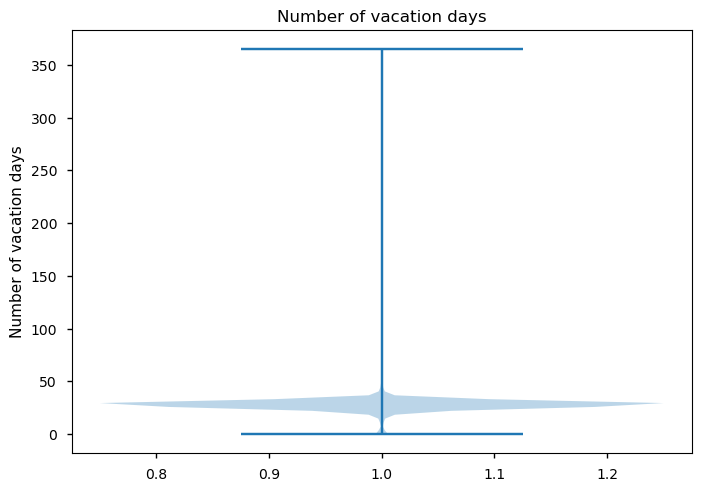

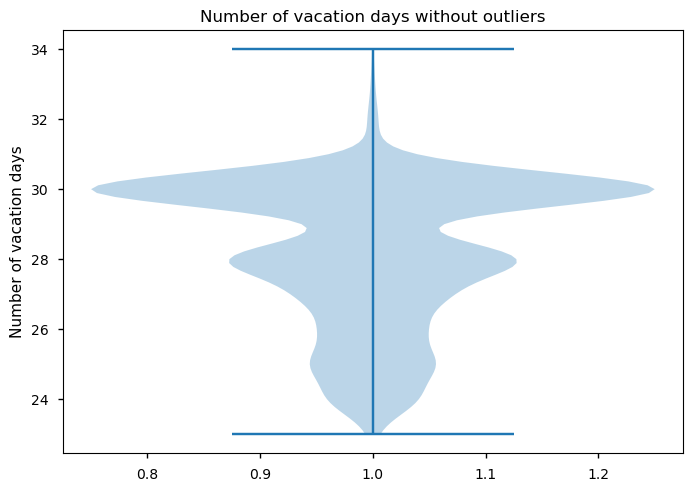

In [98]:
# create violin graph for number of vacation days / must be changed to numeric

numberOfDays = df['VacationDays'].dropna()
numberOfDays = pd.to_numeric(numberOfDays.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

plt.violinplot(numberOfDays)
plt.title('Number of vacation days')
plt.ylabel('Number of vacation days')
plt.savefig(Path('./img/numberOfVacationDays.pdf'))
plt.show()
plt.close()

Q1 = numberOfDays.quantile(0.25)
Q3 = numberOfDays.quantile(0.75)
IQR = Q3 - Q1

numberOfDays = numberOfDays[~((numberOfDays < (Q1 - 1.5 * IQR)) |(numberOfDays > (Q3 + 1.5 * IQR)))]

plt.violinplot(numberOfDays)
plt.title('Number of vacation days without outliers')
plt.ylabel('Number of vacation days')
plt.savefig(Path('./img/numberOfVacationDays.pdf'))
plt.show()
plt.close()

### Years of experience

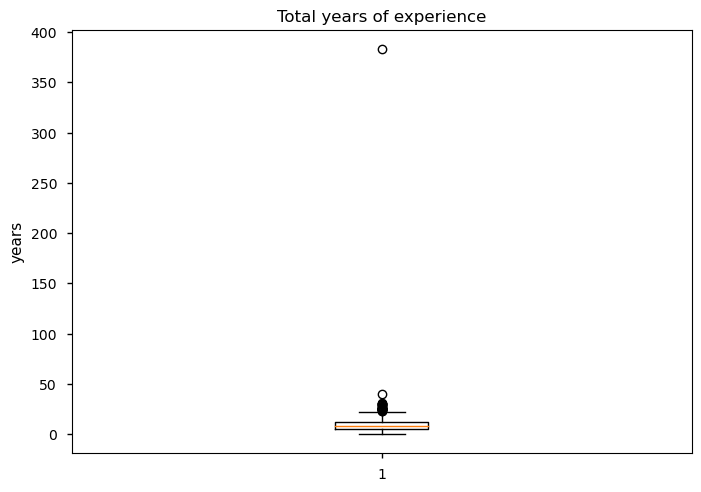

count    1237.000000
mean        9.064673
std        11.893229
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max       383.000000
Name: ExpierenceYears, dtype: float64


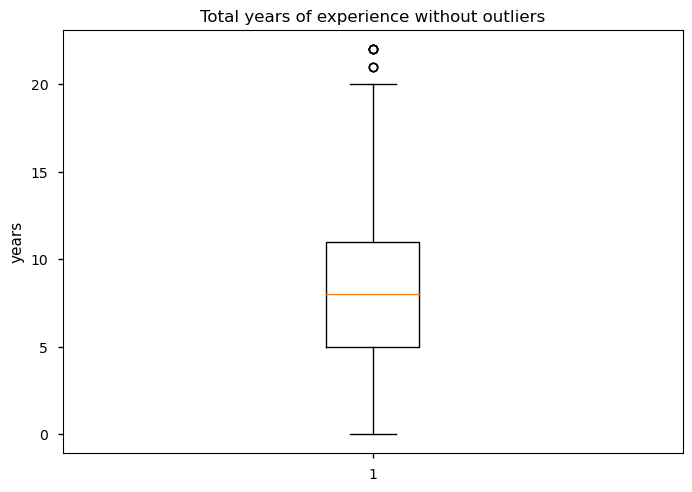

count    1214.000000
mean        8.428336
std         4.717167
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        22.000000
Name: ExpierenceYears, dtype: float64


In [99]:
# create boxplot for years of experience

Expierence = df['ExpierenceYears'].dropna()
Expierence = pd.to_numeric(Expierence.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

plt.boxplot(Expierence)
plt.title('Total years of experience')
plt.ylabel('years')
plt.savefig(Path('./img/totalYearsOfExperienceBoxPlot.pdf'))
plt.show()
plt.close()

print(Expierence.describe())

# create boxplot for years of experience without outliers

Q1 = Expierence.quantile(0.25)
Q3 = Expierence.quantile(0.75)
IQR = Q3 - Q1

ExpierenceOUT = Expierence[~((Expierence < (Q1 - 1.5 * IQR)) |(Expierence > (Q3 + 1.5 * IQR)))]
plt.boxplot(ExpierenceOUT)
plt.title('Total years of experience without outliers')
plt.ylabel('years')
plt.savefig(Path('./img/totalYearsOfExperienceWithoutOutliersBoxPlot.pdf'))
plt.show()
plt.close()

print(ExpierenceOUT.describe())

### SalaryYearAgo

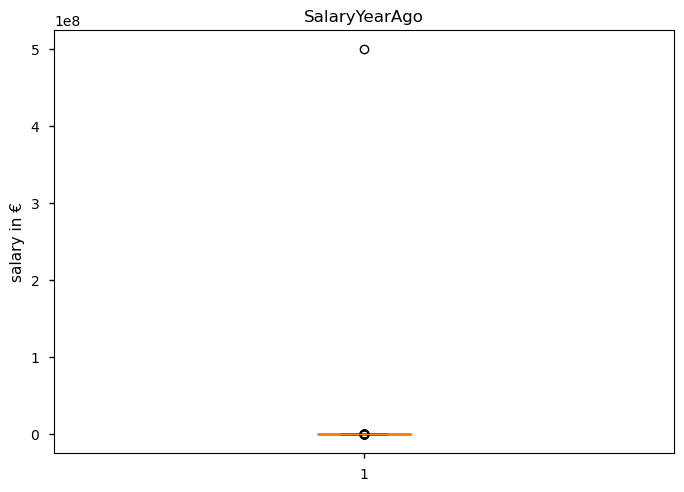

count    8.850000e+02
mean     6.322459e+05
std      1.680508e+07
min      1.100000e+04
25%      5.500000e+04
50%      6.500000e+04
75%      7.500000e+04
max      5.000000e+08
Name: SalaryYearAgo, dtype: float64


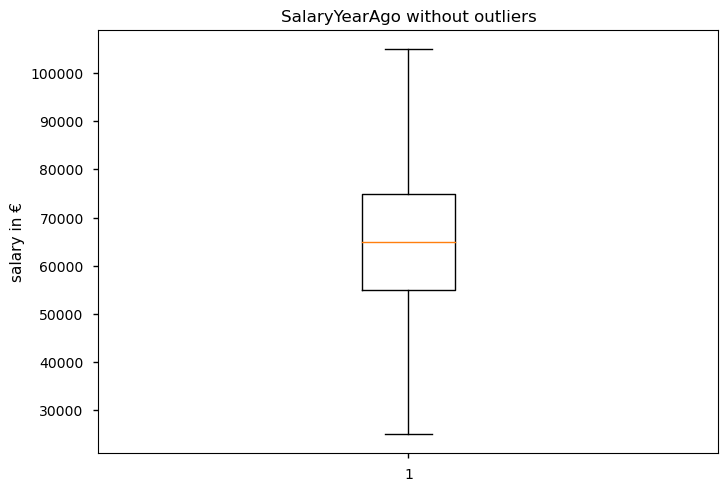

count       839.000000
mean      65038.766389
std       14979.427553
min       25000.000000
25%       55000.000000
50%       65000.000000
75%       75000.000000
max      105000.000000
Name: SalaryYearAgo, dtype: float64


In [100]:
# SalaryYearAgo

SalaryYearAgo = df['SalaryYearAgo'].dropna()
SalaryYearAgo = pd.to_numeric(SalaryYearAgo.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

plt.boxplot(SalaryYearAgo)
plt.title('SalaryYearAgo')
plt.ylabel('salary in €')
plt.savefig(Path('./img/SalaryYearAgo.pdf'))
plt.show()
plt.close()

print(SalaryYearAgo.describe())

# SalaryYearAgo without outliers

Q1 = SalaryYearAgo.quantile(0.25)
Q3 = SalaryYearAgo.quantile(0.75)
IQR = Q3 - Q1

SalaryYearAgoOUT = SalaryYearAgo[~((SalaryYearAgo < (Q1 - 1.5 * IQR)) |(SalaryYearAgo > (Q3 + 1.5 * IQR)))]
plt.boxplot(SalaryYearAgoOUT)
plt.title('SalaryYearAgo without outliers')
plt.ylabel('salary in €')
plt.savefig(Path('./img/SalaryYearAgo_without_outliers.pdf'))
plt.show()
plt.close()

print(SalaryYearAgoOUT.describe())

### Salaries

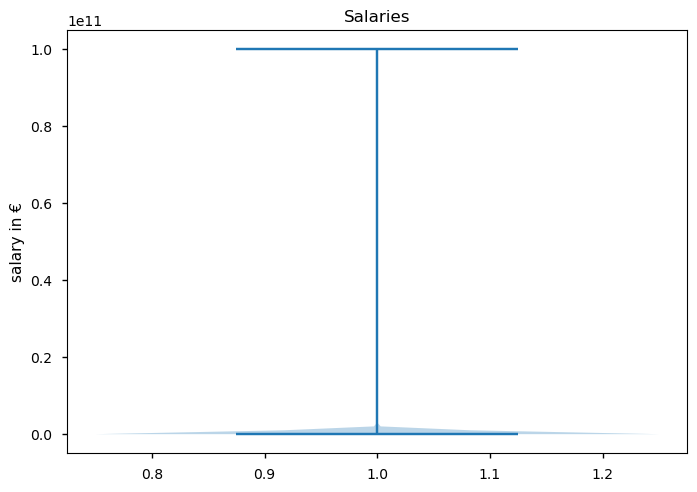

count    1.253000e+03
mean     8.027904e+07
std      2.825061e+09
min      1.000100e+04
25%      5.880000e+04
50%      7.000000e+04
75%      8.000000e+04
max      1.000000e+11
Name: Salary, dtype: float64


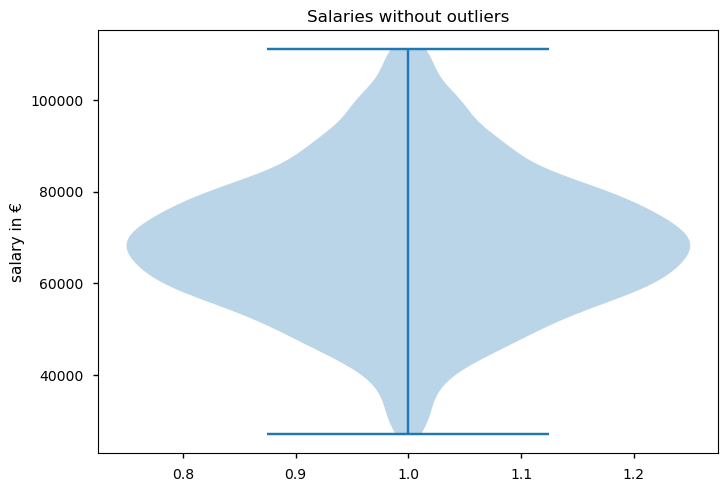

count      1173.000000
mean      69016.847511
std       15864.104213
min       27000.000000
25%       60000.000000
50%       69000.000000
75%       80000.000000
max      111111.000000
Name: Salary, dtype: float64

In [101]:
salaries = df['Salary'].dropna()
plt.violinplot(salaries)
plt.title('Salaries')
plt.ylabel('salary in €')
plt.savefig(Path('./img/salaries.pdf'))
plt.show()
plt.close()

print(salaries.describe())

# clear outliers

Q1 = salaries.quantile(0.25)
Q3 = salaries.quantile(0.75)
IQR = Q3 - Q1

salaries = salaries[~((salaries < (Q1 - 1.5 * IQR)) |(salaries > (Q3 + 1.5 * IQR)))]

plt.violinplot(salaries)
plt.title('Salaries without outliers')
plt.ylabel('salary in €')
plt.savefig(Path('./img/salaries_without_outliers.pdf'))
plt.show()
plt.close()

salaries.describe()

### CompanyTypes

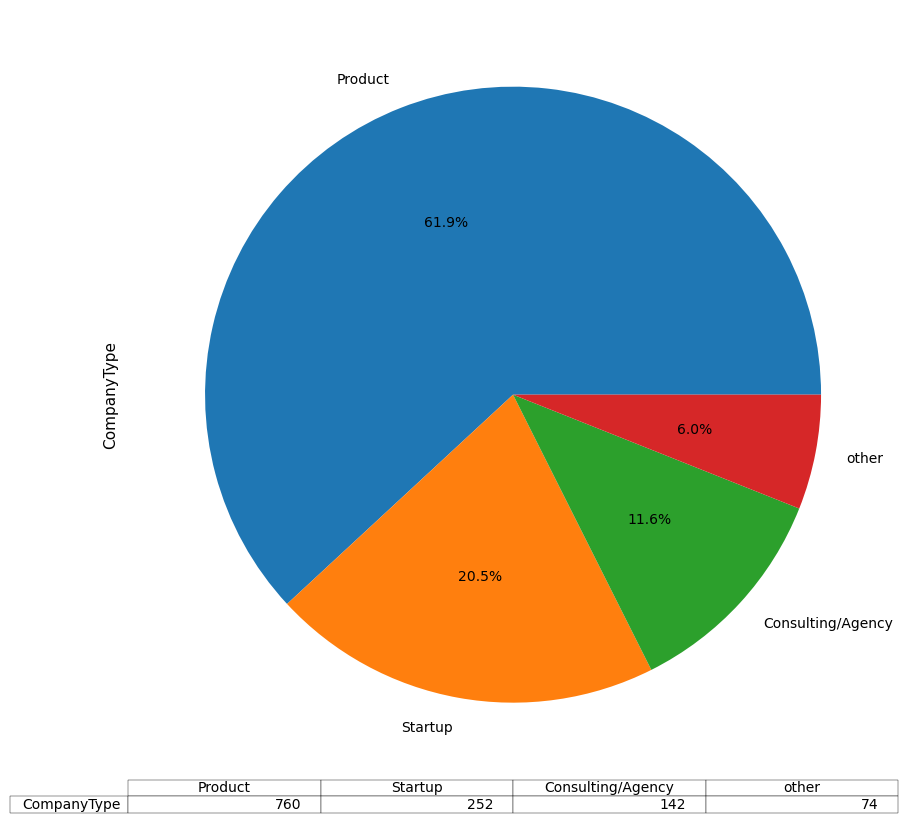

In [102]:
companyType = df['CompanyType'].dropna()
companyType = companyType.str.replace(' ', '')
companyType = companyType.str.replace(',', '')
companyType = companyType.str.replace(';', '')
companyType = companyType.str.replace('’', '')

# drop all rows with 'other' in companyType
companyType = companyType[~companyType.str.contains('other', na=False)]

# if item freqquency is less than 10, replace with 'other'
companyType = companyType.mask(companyType.map(companyType.value_counts()) < 10, 'other')

companyType.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), table=True)
plt.savefig(Path('./img/companyTypePieChart.pdf'))

### ExpierenceYears

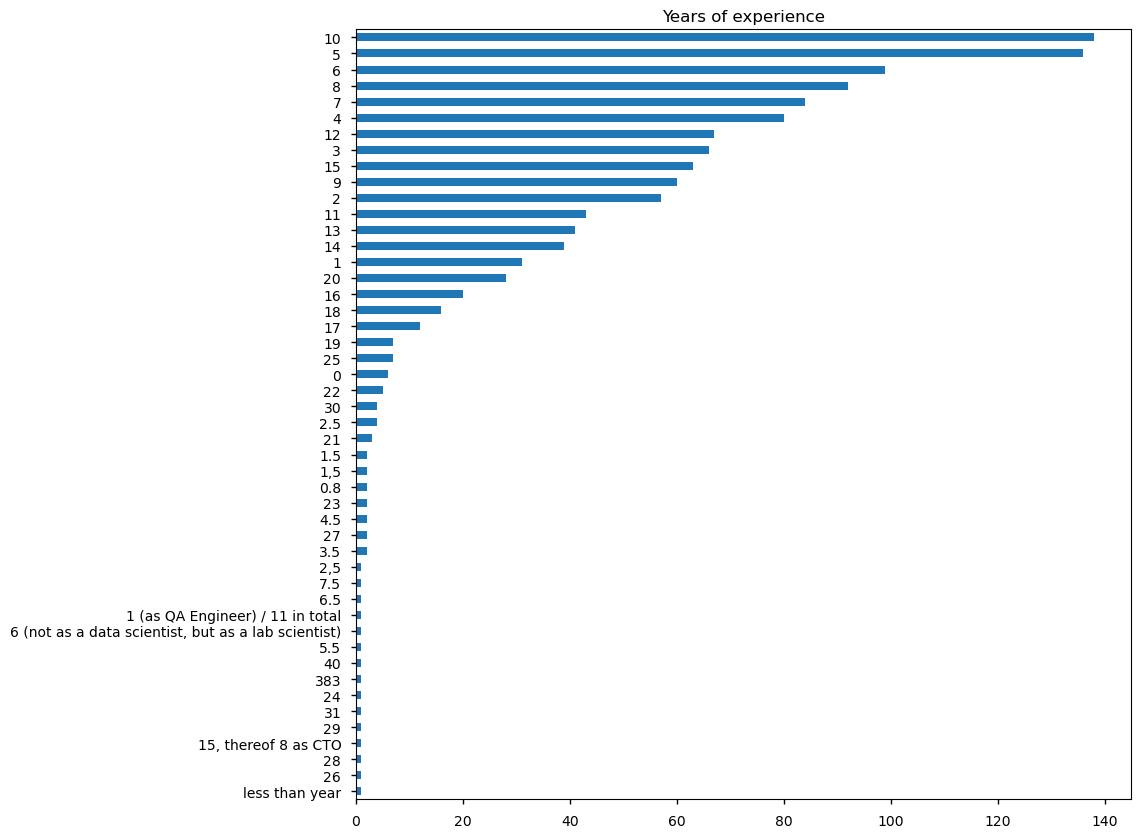

In [103]:
ExpierenceYearsCounts = df['ExpierenceYears'].dropna()
# sort values in ascending order
ExpierenceYearsCounts = ExpierenceYearsCounts.sort_values(ascending=True)
ExpierenceYearsCounts = ExpierenceYearsCounts.value_counts(sort=True, ascending=True)
ExpierenceYearsCounts.plot(kind='barh', figsize=(10, 10), title='Years of experience')
plt.savefig(Path('./img/yearsOfExperienceBarChart.pdf'))

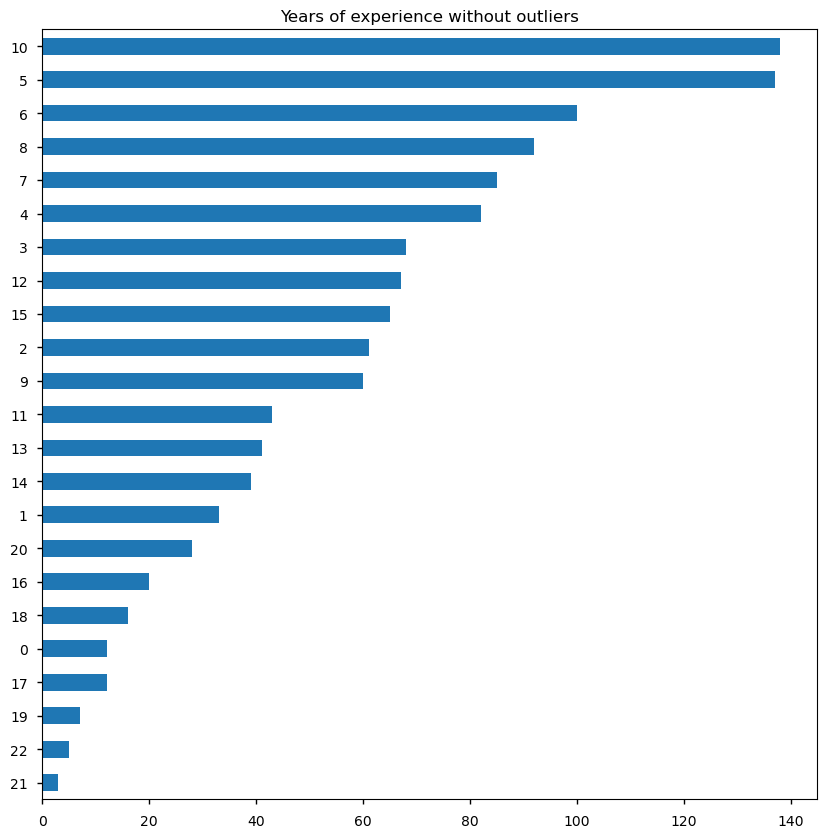

In [104]:
ExpierenceYearsCounts = df['ExpierenceYears'].dropna()
ExpierenceYearsCounts = pd.to_numeric(ExpierenceYearsCounts.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

# IQR 
Q1 = ExpierenceYearsCounts.quantile(0.25)
Q3 = ExpierenceYearsCounts.quantile(0.75)
IQR = Q3 - Q1

ExpierenceYearsCounts = ExpierenceYearsCounts[~((ExpierenceYearsCounts < (Q1 - 1.5 * IQR)) |(ExpierenceYearsCounts > (Q3 + 1.5 * IQR)))]
ExpierenceYearsCounts = ExpierenceYearsCounts.sort_values(ascending=True)
ExpierenceYearsCounts = ExpierenceYearsCounts.value_counts(sort=True, ascending=True)
ExpierenceYearsCounts.plot(kind='barh', figsize=(10, 10), title='Years of experience without outliers')
plt.savefig(Path('./img/yearsOfExperienceWithoutOutliersBarChart.pdf'))

### CompanySize

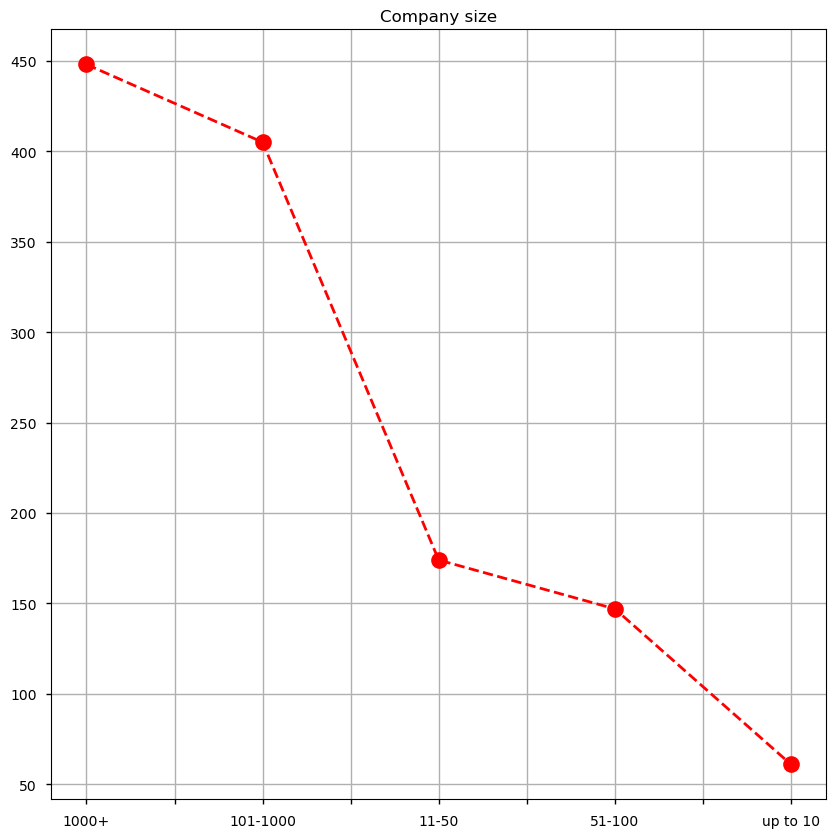

In [105]:
df['CompanySize'].value_counts().plot(kind='line', figsize=(10, 10), title='Company size', grid=True,
 marker='o', color='red', linestyle='dashed', linewidth=2, markersize=12)
plt.savefig(Path('./img/companySizeLineChart.pdf'))

### EmploymentStatus

Full-time                     1192
Self-employed (freelancer)      28
Part-time                        8
Company Director                 4
Internship                       4
Name: Employment status, dtype: int64

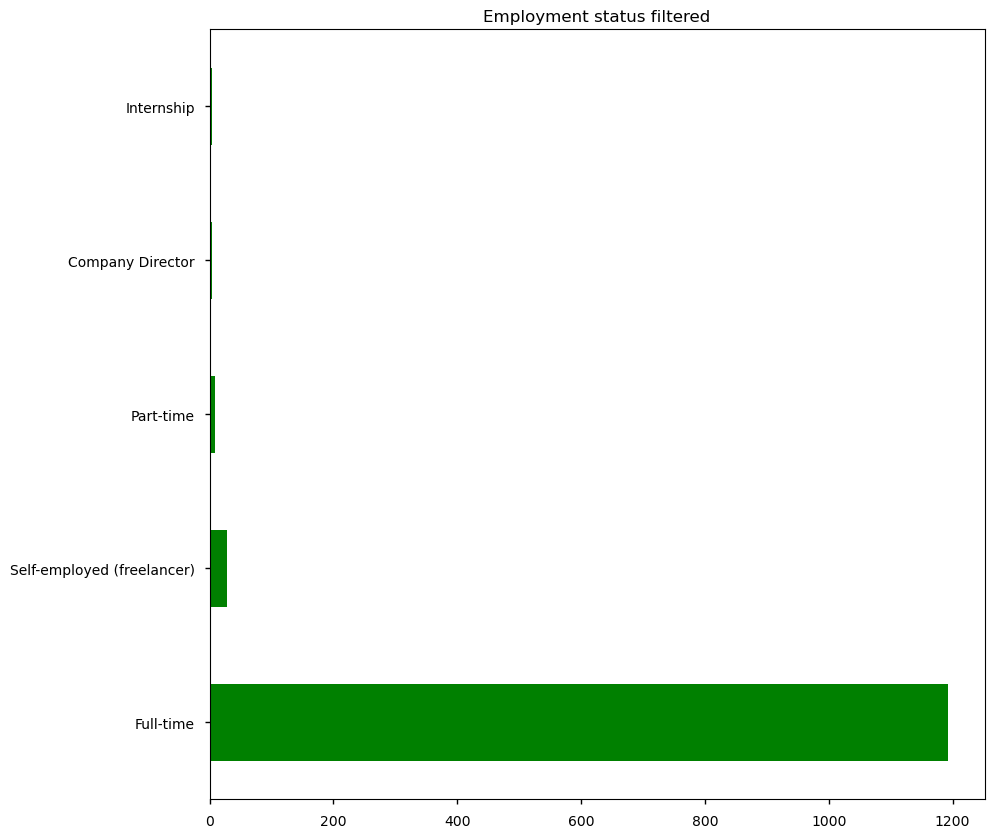

In [106]:
EmploymentStatus = df['Employment status'].dropna()

# join duplicates with different names
EmploymentStatus = EmploymentStatus.replace('Full-time employee', 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Full time employee', 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Full time', 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Full-time', 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Full-time position, part-time position, & self-employed (freelancing, tutoring)', 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Intern', 'Student')
EmploymentStatus = EmploymentStatus.replace('Werkstudent', 'Student')
EmploymentStatus = EmploymentStatus.replace('Working Student', 'Student')
EmploymentStatus = EmploymentStatus.replace('Working student', 'Student')
EmploymentStatus = EmploymentStatus.replace('working student', 'Student')
EmploymentStatus = EmploymentStatus.replace('Student', 'Internship')
EmploymentStatus = EmploymentStatus.replace("full-time, but 32 hours per week (it was my request, I'm a student)", 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Part-time employee', 'Part-time')
EmploymentStatus = EmploymentStatus.replace('Founder', 'Company Director')



#EmploymentStatus.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), table=True)


#EmploymentStatus = EmploymentStatus.mask(EmploymentStatus.map(EmploymentStatus.value_counts()) < 2, 'other')


EmploymentStatus.value_counts().plot(kind='barh', figsize=(10, 10), title='Employment status filtered', color='green')
plt.savefig(Path('./img/employmentStatusBarChart.pdf'))
EmploymentStatus.value_counts()

### SeniorityLevel

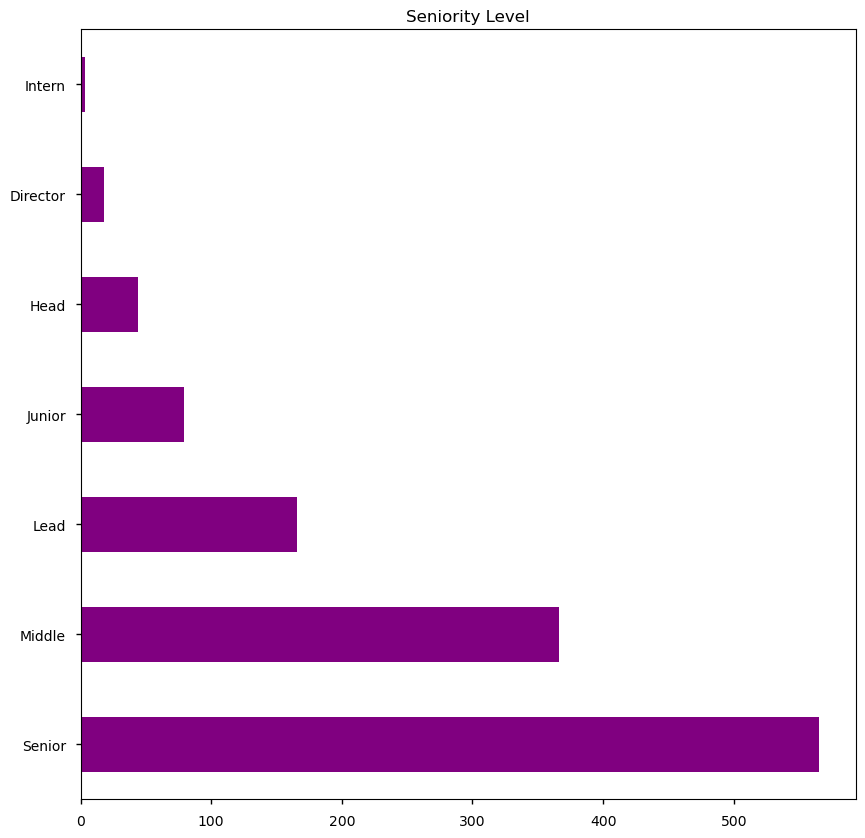

In [107]:
# create pie graph of Seniority Level

seniorityLevel = df['SeniorityLevel'].dropna()

seniorityLevel.mask(seniorityLevel.map(seniorityLevel.value_counts()) < 2, 'Director', inplace=True)
seniorityLevel.mask(seniorityLevel.map(seniorityLevel.value_counts()) < 5 , 'Intern', inplace=True)
seniorityLevel.value_counts().plot(kind='barh', figsize=(10, 10), title='Seniority Level', color='purple')
plt.savefig(Path('./img/seniorityLevelBarChart.pdf'))

### City

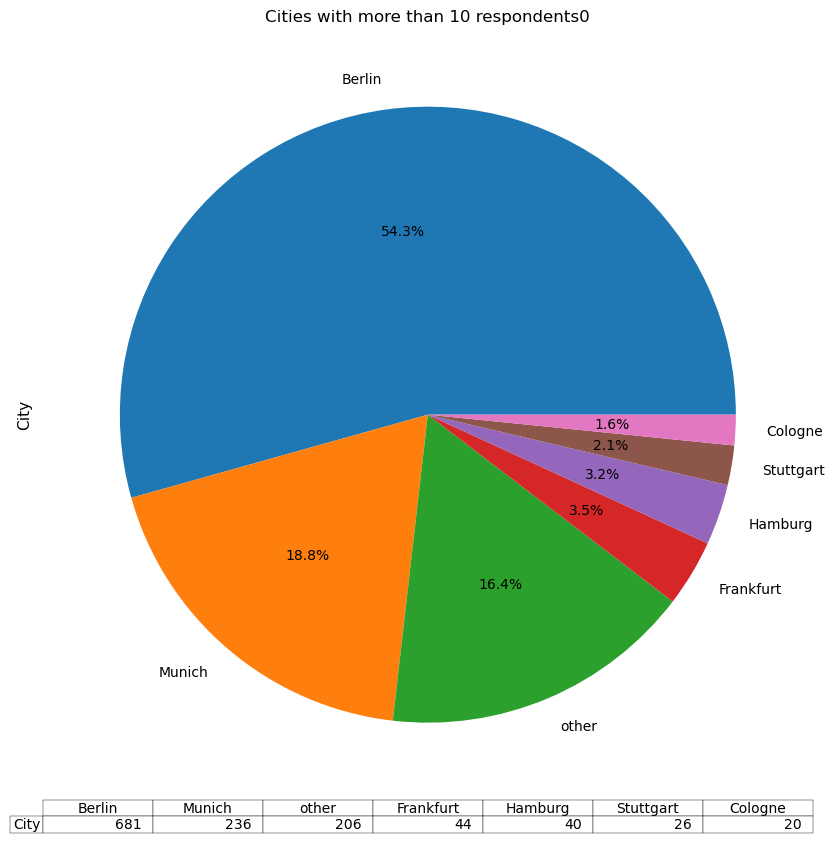

In [108]:
citySeries = df['City'].dropna()
citySeries= citySeries[~citySeries.str.contains('other', na=False)]
citySeries = citySeries.mask(citySeries.map(citySeries.value_counts()) <= 10, 'other')
citySeries.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Cities with more than 10 respondents0',  table=True)
plt.savefig(Path('./img/citiesPieChart.pdf'))

### MainLanguage

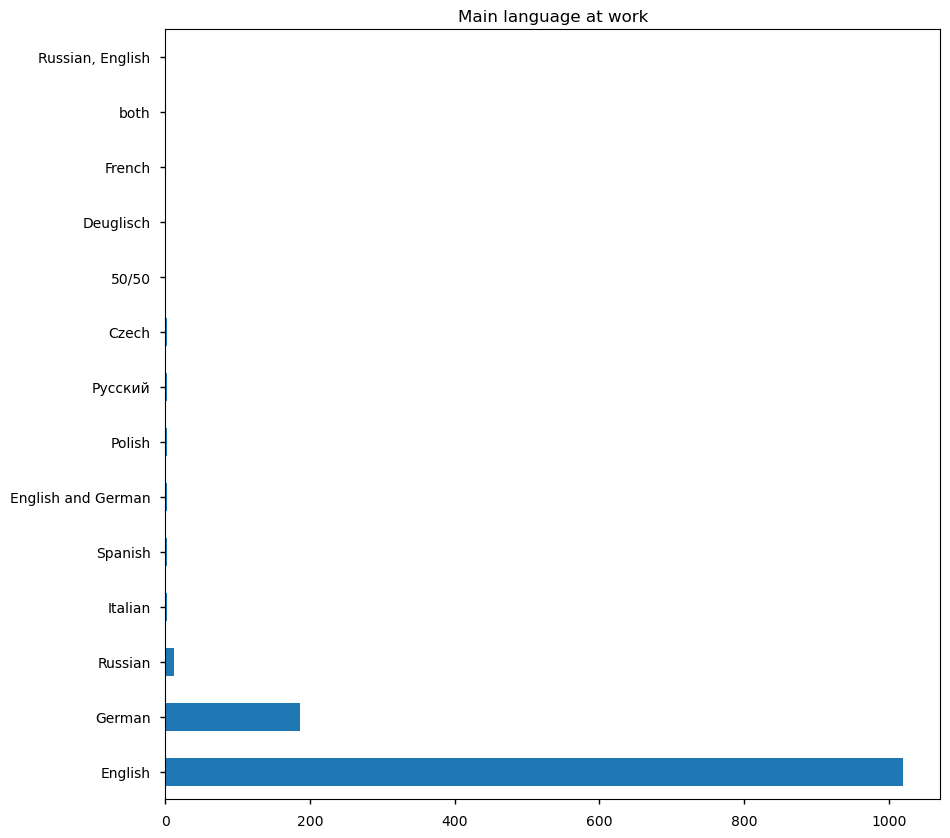

In [109]:
# main language in company unfiltered
df['Main language at work'].value_counts().plot(kind='barh', figsize=(10, 10), title='Main language at work')
plt.savefig(Path('./img/mainLanguageAtWorkBarChart.pdf'))

English    1024
German      186
Russian      14
Italian       3
Spanish       3
Polish        2
Czech         2
French        1
Name: Main language at work, dtype: int64

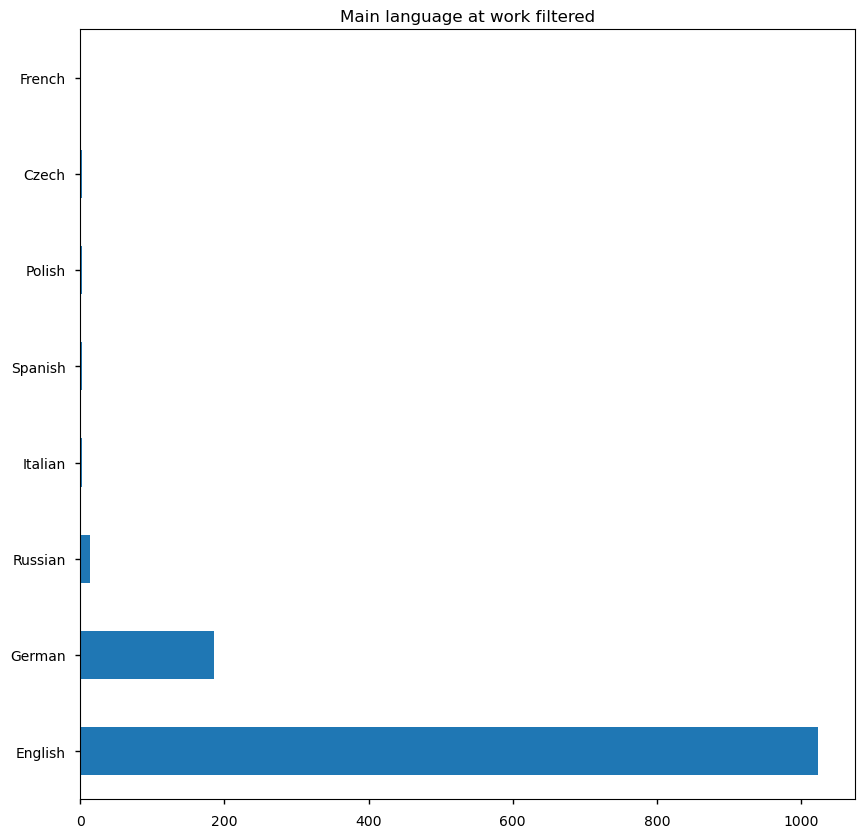

In [110]:
# main language in company filtered
mainLanguageSeries = df['Main language at work']
mainLanguageSeries.dropna(inplace=True)

mainLanguageSeries.replace('Russian, English', 'English', inplace=True)
mainLanguageSeries.replace('Deuglisch', 'English', inplace=True)
mainLanguageSeries.replace('English and German', 'English', inplace=True)
mainLanguageSeries.add('Gemrman')
mainLanguageSeries.replace('Русский', 'Russian', inplace=True)

# drop row with name '50/50'
mainLanguageSeries = mainLanguageSeries[~mainLanguageSeries.str.contains('50/50', na=False)]
mainLanguageSeries = mainLanguageSeries[~mainLanguageSeries.str.contains('both', na=False)]
mainLanguageSeries.value_counts().plot(kind='barh', figsize=(10, 10), title='Main language at work filtered')
plt.savefig(Path('./img/mainLanguageAtWorkFilteredBarChart.pdf'))
mainLanguageSeries.value_counts()

### Programming Languagues

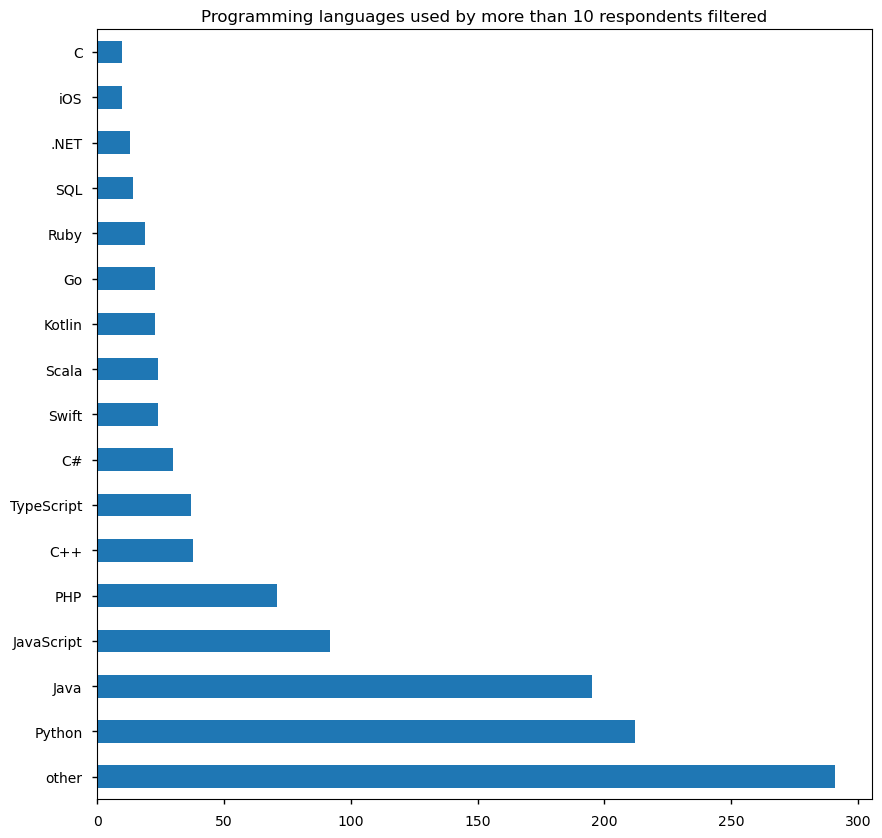

In [111]:
programmingLanguageSeries = df['Your main technology / programming language'].dropna()
programmingLanguageSeries = programmingLanguageSeries.str.replace(' ', '')
programmingLanguageSeries = programmingLanguageSeries.str.replace(',', '')
programmingLanguageSeries = programmingLanguageSeries.str.replace(';', '')
programmingLanguageSeries = programmingLanguageSeries.str.replace('’', '')
programmingLanguageSeries = programmingLanguageSeries.str.replace('python', 'Python')
programmingLanguageSeries = programmingLanguageSeries.str.replace('Javascript', 'JavaScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('JS', 'JavaScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('javascript', 'JavaScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('Typescript', 'TypeScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('typescript', 'TypeScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('JavaScript/TypeScript', 'TypeScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('java', 'Java')
programmingLanguageSeries = programmingLanguageSeries.str.replace('php', 'PHP')
programmingLanguageSeries = programmingLanguageSeries.str.replace('Php', 'PHP')

programmingLanguageSeries.mask(programmingLanguageSeries.map(programmingLanguageSeries.value_counts()) < 10, 'other', inplace=True)
programmingLanguageSeries.value_counts().plot(kind='barh', figsize=(10, 10), title='Programming languages used by more than 10 respondents filtered')
plt.savefig(Path('./img/programmingLanguageBarChart.pdf'))

### Lost job due to coronavirus

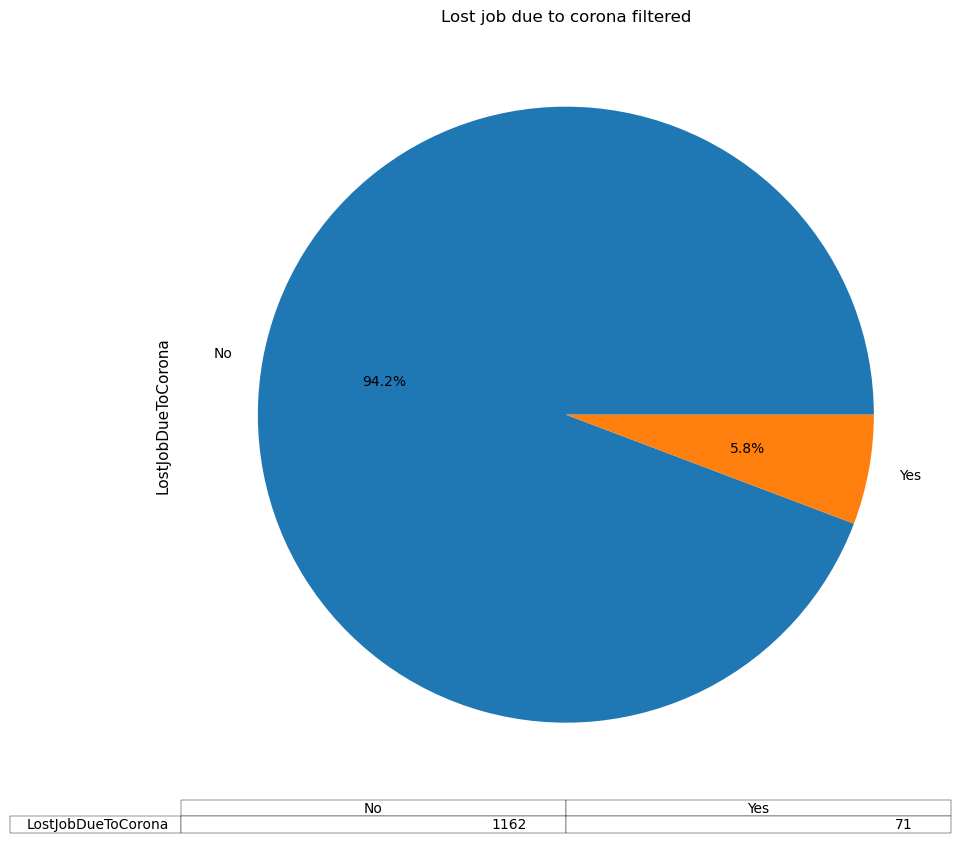

In [112]:
# create pie graph of LostJobDueToCorona

LostJobDueToCorona = df['LostJobDueToCorona'].dropna()

LostJobDueToCorona.mask(LostJobDueToCorona.map(LostJobDueToCorona.value_counts()) < 10, 'Yes', inplace=True)
LostJobDueToCorona.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Lost job due to corona filtered', table=True)
plt.savefig(Path('./img/lostJobDueToCoronaPieChart.pdf'))

### Gender

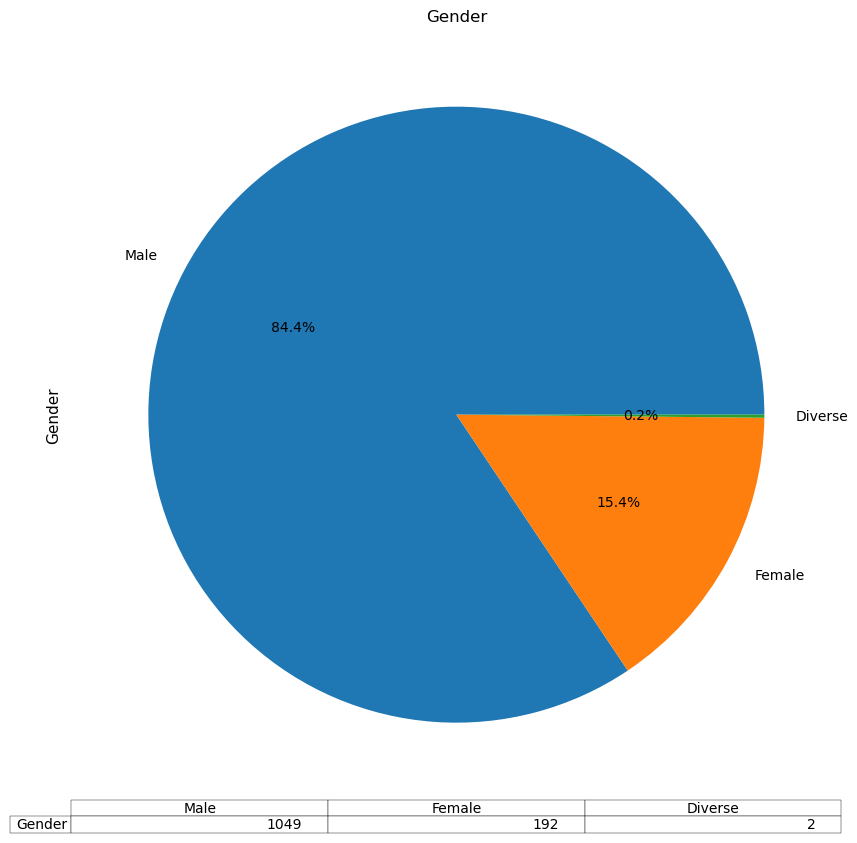

In [113]:
genderSeries = df['Gender'].dropna()
genderSeries.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title='Gender', table=True)
plt.savefig(Path('./img/genderPieChart.pdf'))

### Position

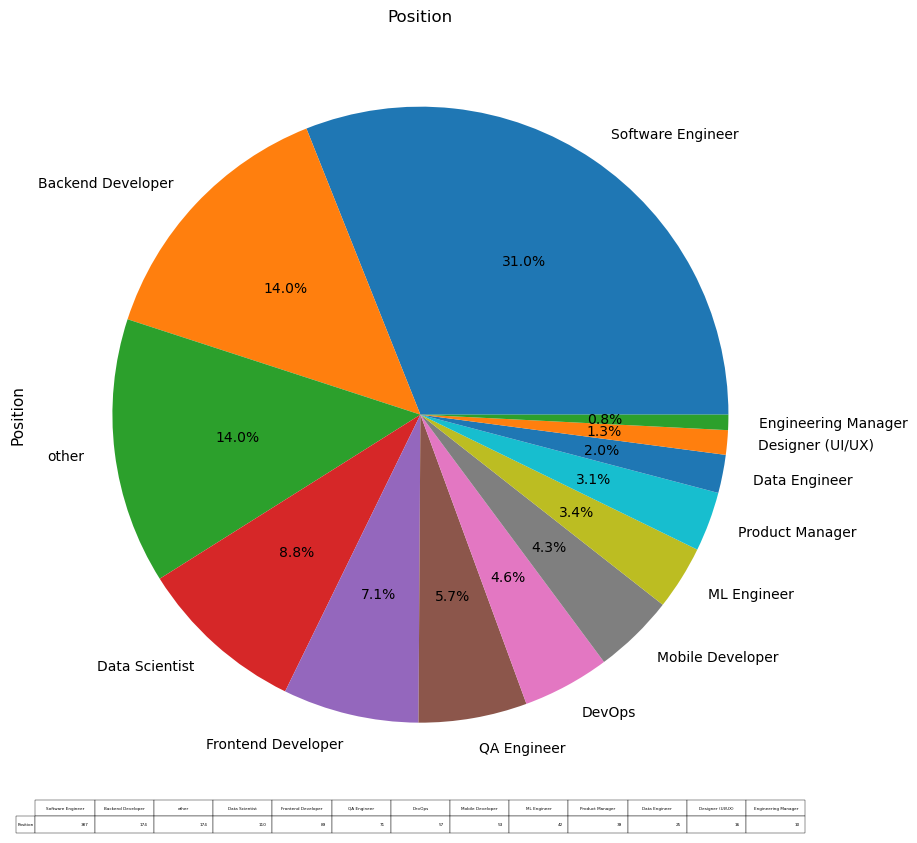

In [114]:
positionSeries = df['Position'].dropna()

positionSeries.mask(positionSeries.map(positionSeries.value_counts()) < 10, 'other', inplace=True)

positionSeries.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Position', table=True)
plt.savefig(Path('./img/positionPieChart.pdf'))

### Yearly bonus + stocks in EUR

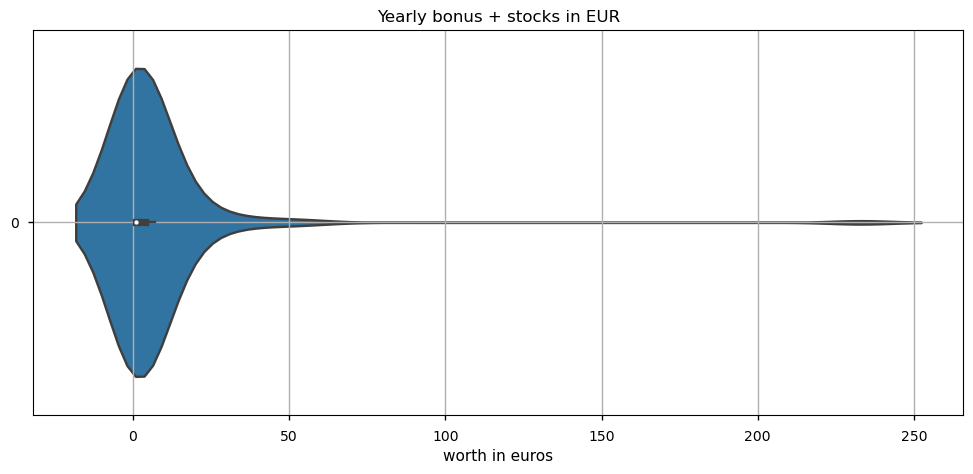

In [115]:
# graph for yearly bonus + stocks in EUR

yearlyBonusSeries = df['Yearly bonus + stocks in EUR'].dropna()

# remove all non numeric characters
yearlyBonusSeries = yearlyBonusSeries.str.replace(' ', '')
yearlyBonusSeries = yearlyBonusSeries.str.replace(',', '')
yearlyBonusSeries = yearlyBonusSeries.str.replace('€', '')


# convert to numeric
yearlyBonusSeries = pd.to_numeric(yearlyBonusSeries.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

# IQR
Q1 = yearlyBonusSeries.quantile(0.25)
Q3 = yearlyBonusSeries.quantile(0.75)
IQR = Q3 - Q1

# remove outliers
yearlyBonusSeries = yearlyBonusSeries[~((yearlyBonusSeries < (Q1 - 1.5 * IQR)) |(yearlyBonusSeries > (Q3 + 1.5 * IQR)))]
yearlyBonusSeries = yearlyBonusSeries.sort_values(ascending=True)
yearlyBonusSeries = yearlyBonusSeries.value_counts(sort=True, ascending=True)

# plot in violin plot

plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,5))
sns.violinplot(data=yearlyBonusSeries, orient='h')
plt.grid()
plt.title('Yearly bonus + stocks in EUR')
plt.xlabel('worth in euros')
plt.savefig(Path('./img/SalaryViolin' + '.pdf'))
plt.show()
plt.close()


### StocksYearAgoSameCountry

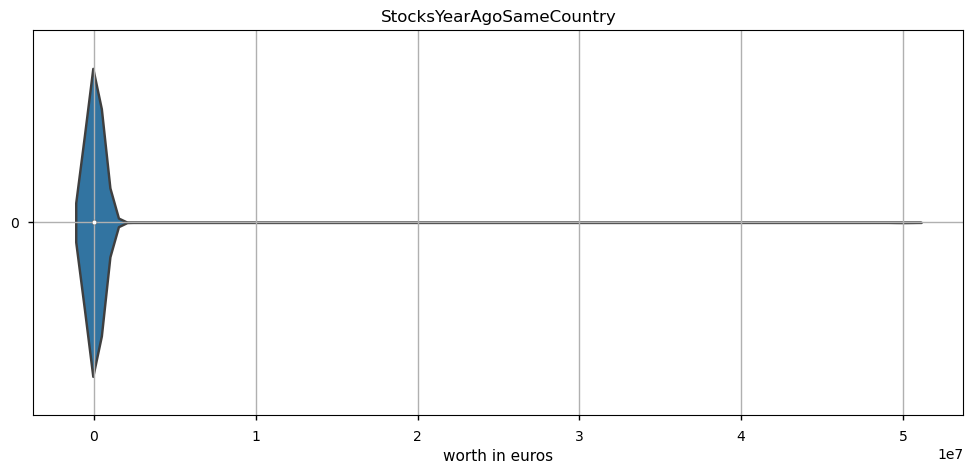

count    6.140000e+02
mean     1.028591e+05
std      2.017246e+06
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+03
75%      3.630000e+04
max      5.000000e+07
Name: StocksYearAgoSameCountry, dtype: float64


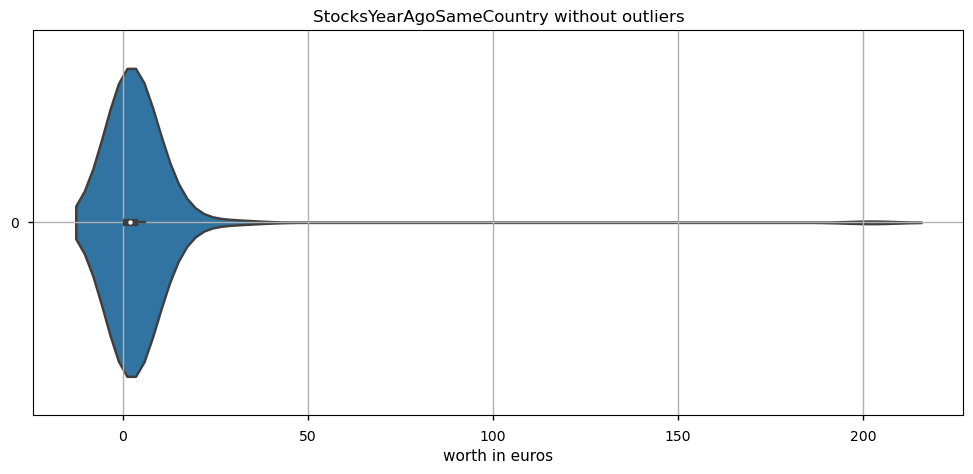

count    129.000000
mean       4.759690
std       18.041088
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max      202.000000
Name: StocksYearAgoSameCountry, dtype: float64


<AxesSubplot:title={'center':'StocksYearAgoSameCountry'}>

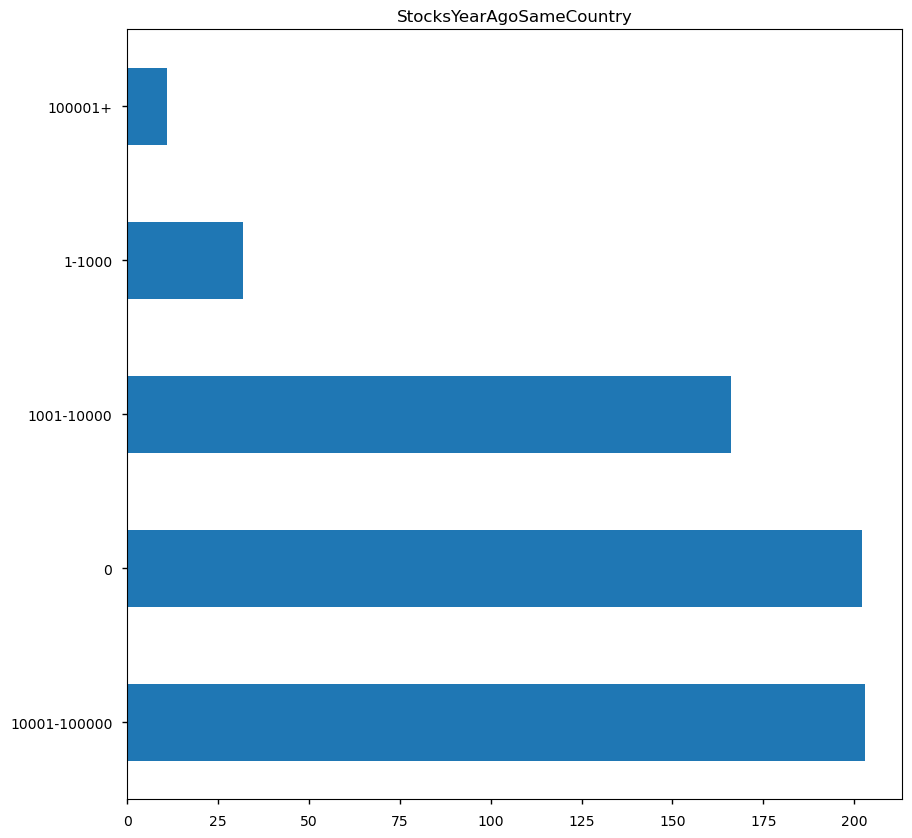

In [116]:
dfStocksYearAgoSameCountry = df['StocksYearAgoSameCountry'].dropna()

# remove all non numeric characters
dfStocksYearAgoSameCountry = dfStocksYearAgoSameCountry.str.replace(' ', '')
dfStocksYearAgoSameCountry = dfStocksYearAgoSameCountry.str.replace(',', '')
dfStocksYearAgoSameCountry = dfStocksYearAgoSameCountry.str.replace('€', '')

# convert to numeric
dfStocksYearAgoSameCountry = pd.to_numeric(dfStocksYearAgoSameCountry.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

# plot in violin plot

plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,5))
sns.violinplot(data=dfStocksYearAgoSameCountry, orient='h')
plt.grid()
plt.title('StocksYearAgoSameCountry')
plt.xlabel('worth in euros')
plt.savefig(Path('./img/StocksYearAgoSameCountry' + '.pdf'))
plt.show()

print(dfStocksYearAgoSameCountry.describe())

# IQR
Q1 = dfStocksYearAgoSameCountry.quantile(0.25)
Q3 = dfStocksYearAgoSameCountry.quantile(0.75)  
IQR = Q3 - Q1

# remove outliers
dfStocksYearAgoSameCountryIQR = dfStocksYearAgoSameCountry[~((dfStocksYearAgoSameCountry < (Q1 - 1.5 * IQR)) |(dfStocksYearAgoSameCountry > (Q3 + 1.5 * IQR)))]
dfStocksYearAgoSameCountryIQR = dfStocksYearAgoSameCountry.sort_values(ascending=True)
dfStocksYearAgoSameCountryIQR = dfStocksYearAgoSameCountry.value_counts(sort=True, ascending=True)


# plot in violin plot

plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,5))
sns.violinplot(data=dfStocksYearAgoSameCountryIQR, orient='h')
plt.grid()
plt.title('StocksYearAgoSameCountry without outliers')
plt.xlabel('worth in euros')
plt.savefig(Path('./img/StocksYearAgoSameCountry' + '.pdf'))
plt.show()
plt.close()
print(dfStocksYearAgoSameCountryIQR.describe())

# map dfStocksYearAgoSameCountry to 5 categories
dfStocksYearAgoSameCountry = dfStocksYearAgoSameCountry.apply(lambda x: '0' if x == 0 else '1-1000' if x > 0 and x <= 1000 else '1001-10000' if x > 1000 and x <= 10000 else '10001-100000' if x > 10000 and x <= 100000 else '100001+')

# plot in bar chart
dfStocksYearAgoSameCountry.value_counts().plot(kind='barh',  figsize=(10, 10), title='StocksYearAgoSameCountry')


### ShortWeekHours

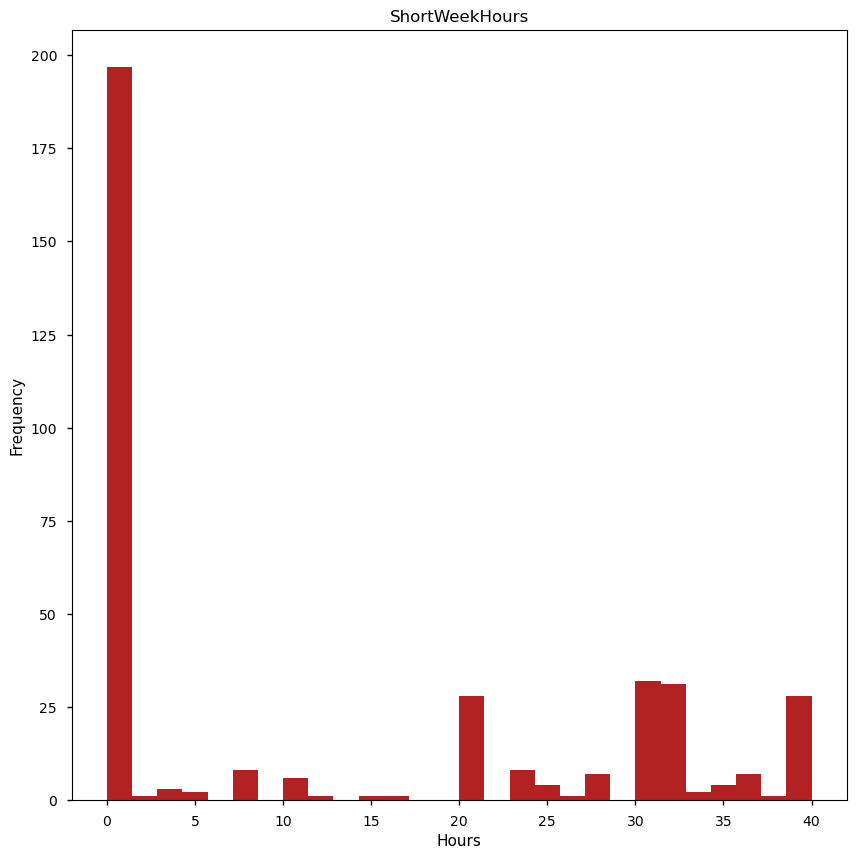

In [117]:
shortWeekHours = df['ShortWeekHours'].dropna()

# convert to numeric
shortWeekHours = pd.to_numeric(shortWeekHours.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

ax = shortWeekHours.plot(kind='hist', bins=28, figsize=(10, 10), title='ShortWeekHours', color='firebrick')
ax.set_xlabel('Hours')
plt.savefig(Path('./img/ShortWeekHours' + '.pdf'))

### CovidSupport

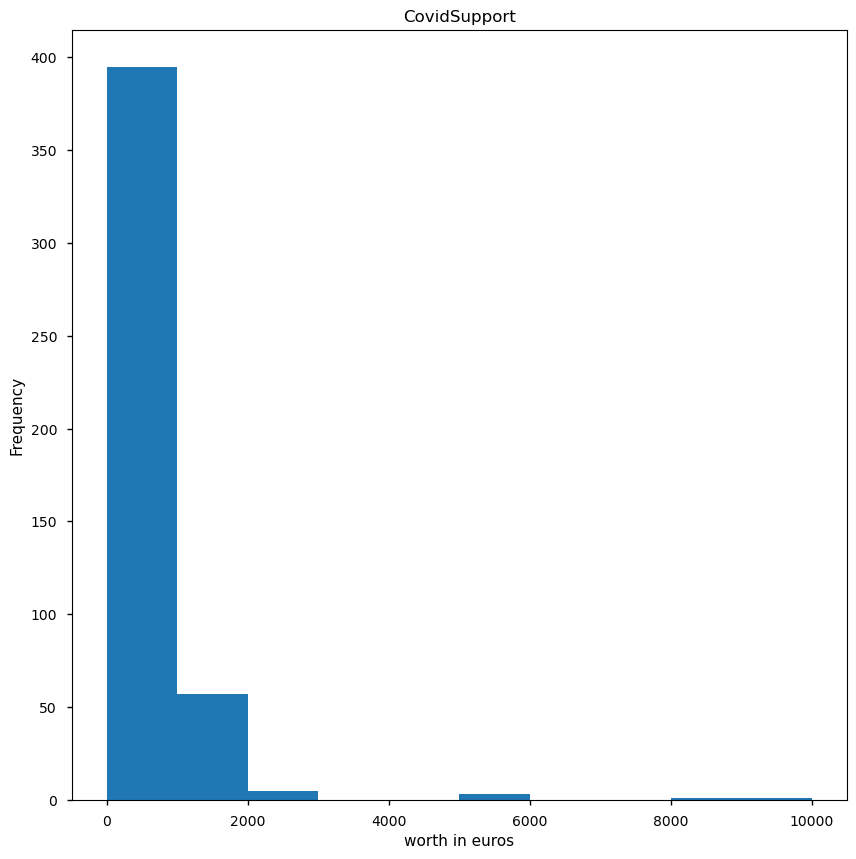

In [118]:
covidSupport = df['CovidSupport'].dropna()

# convert to numeric
covidSupport = pd.to_numeric(covidSupport.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

ax = covidSupport.plot(kind='hist', bins=10, figsize=(10, 10), title='CovidSupport')
ax.set_xlabel('worth in euros')
plt.savefig(Path('./img/CovidSupport' + '.pdf'))

### ContractDuration

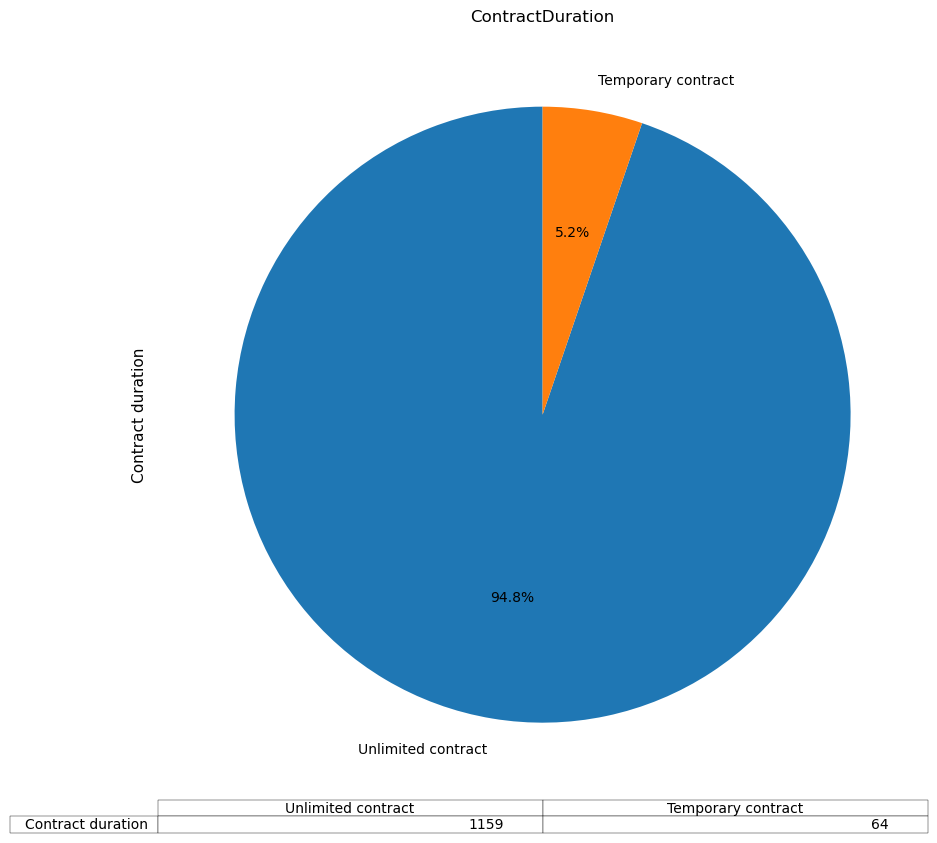

In [119]:
ContractDuration = df['Сontract duration'].dropna()

ContractDuration.drop(ContractDuration[ContractDuration == '0'].index, inplace=True)

ContractDuration.value_counts().plot(kind='pie',figsize=(10, 10), title='ContractDuration', autopct='%1.1f%%', rot=180, table=True, startangle=90)
plt.savefig(Path('./img/ContractDuration' + '.pdf'))

### Gender And Salary

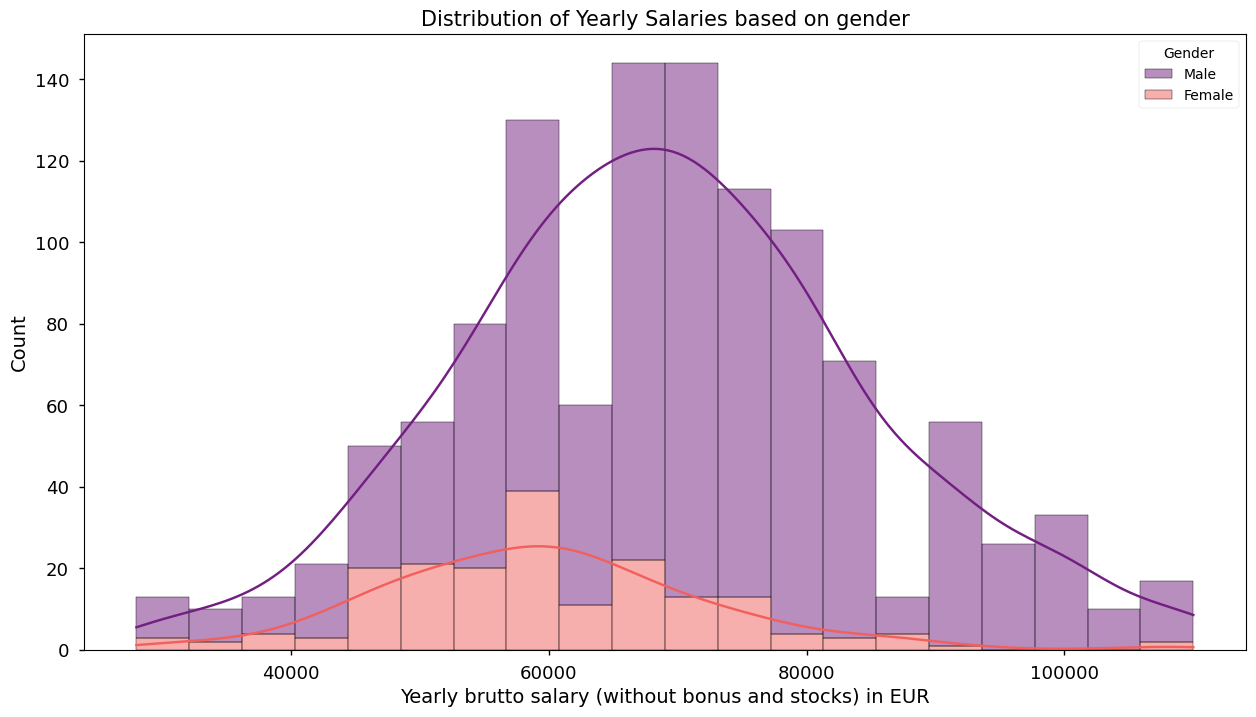

In [120]:
feature = 'Salary'

p25 = df[feature].quantile(0.25) # 58800.0
p75 = df[feature].quantile(0.75) # 80000.0
iqr = p75 - p25 # 21200.0

upper_limit = p75 + 1.5 * iqr # 111800.0
lower_limit = p25 - 1.5 * iqr # 27000.0

# New DataFrame after removing the outlier 
new_df = df[(df[feature] > lower_limit) & (df[feature] < upper_limit)]

# Distribution of Yearly Salaries 
plt.figure(figsize=(15,8))
sns.histplot(x='Salary',data=new_df,
             bins=20, kde=True, hue='Gender',multiple="stack",palette='magma')
plt.xticks(fontsize=13)
plt.title('Distribution of Yearly Salaries based on gender',fontsize=15)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.savefig(Path('./img/Salary' + '.pdf'))
plt.show()

### Salary and features

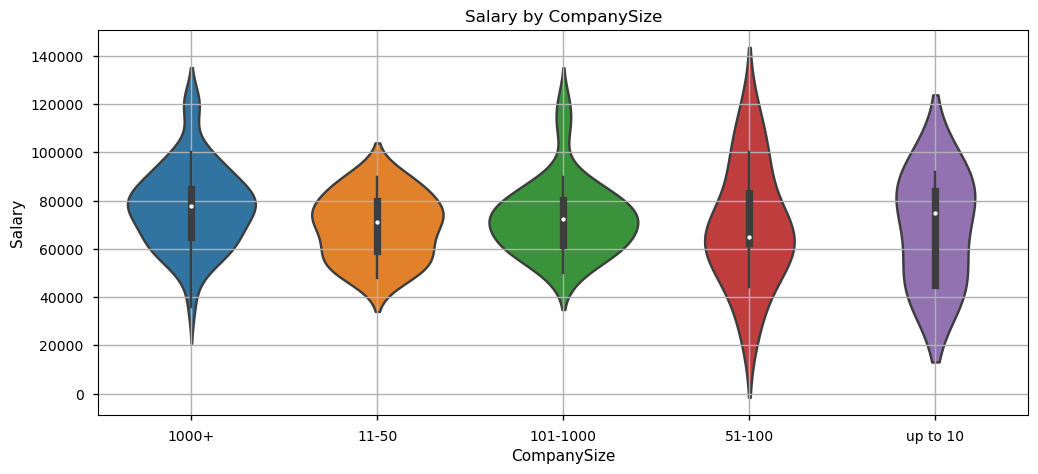

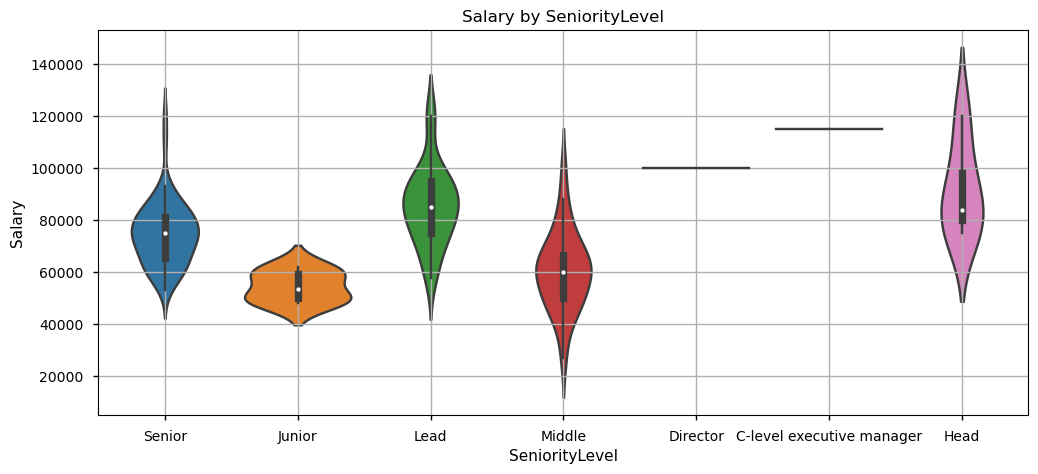

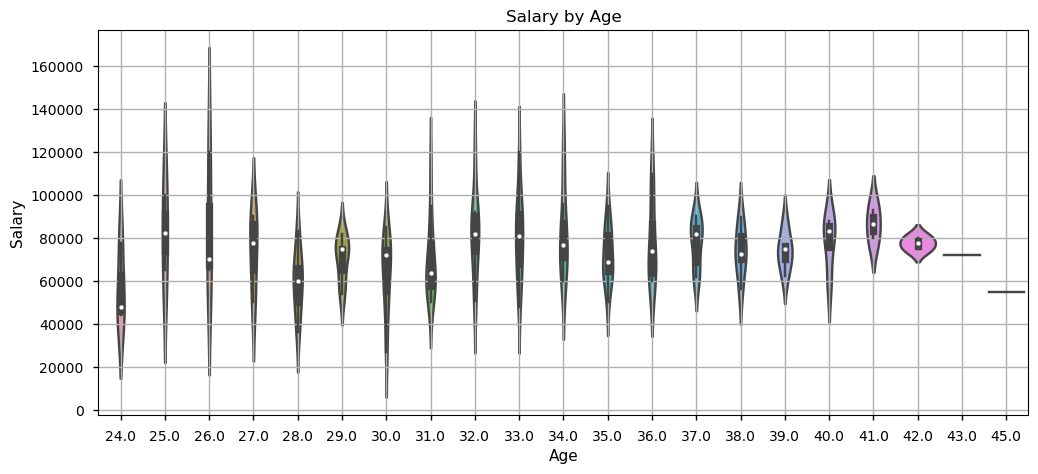

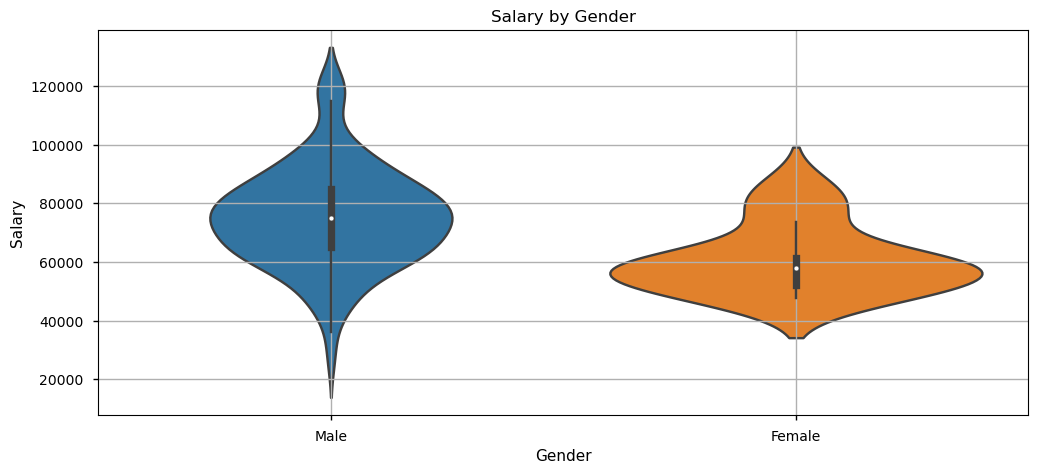

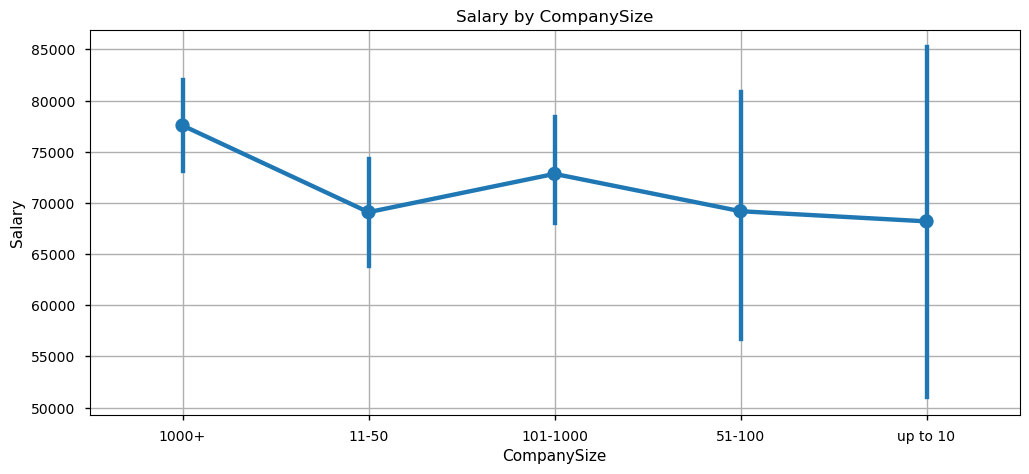

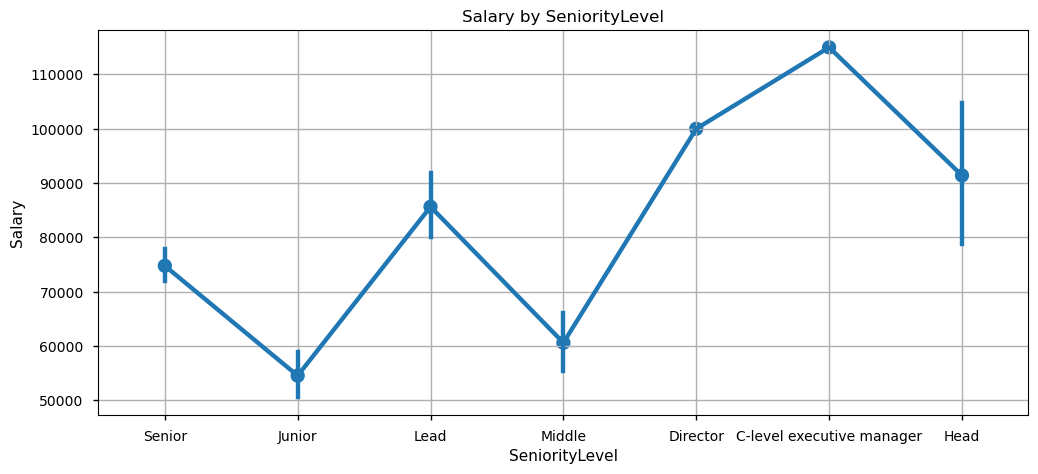

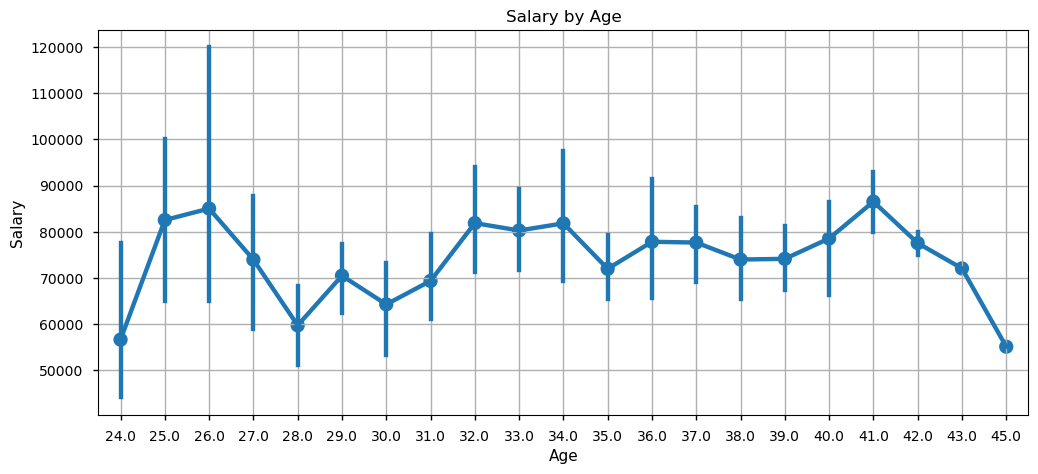

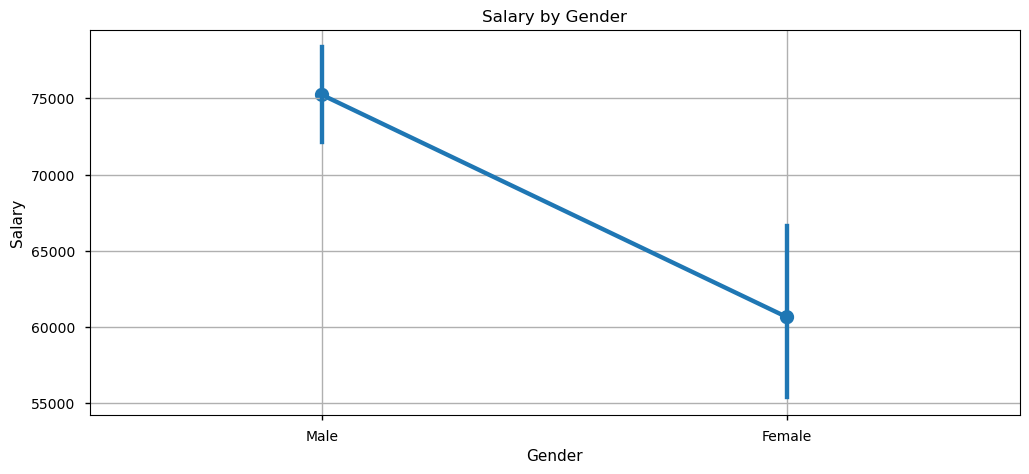

In [121]:
dfSalaryAndFeatures = df.copy(deep=True)
# correlation graphs for numerical data
dfSalaryAndFeatures.dropna(axis=0, inplace=True)

# remove outliers for every numerical column
for column in dfSalaryAndFeatures.select_dtypes(include='number').columns:
    Q1 = dfSalaryAndFeatures[column].quantile(0.25)
    Q3 = dfSalaryAndFeatures[column].quantile(0.75)
    IQR = Q3 - Q1
    dfSalaryAndFeatures= dfSalaryAndFeatures[~((dfSalaryAndFeatures[column] < (Q1 - 1.5 * IQR)) |(dfSalaryAndFeatures[column] > (Q3 + 1.5 * IQR)))]

# create correlation violin plots
my_features = ['CompanySize', 'SeniorityLevel', 'Age', 'Gender']

for f in my_features:
    plt.style.use('seaborn-notebook')
    plt.figure(figsize=(12,5))
    sns.violinplot(data=dfSalaryAndFeatures, x=f, y='Salary')
    plt.grid()
    plt.title('Salary by ' + f)
    plt.savefig(Path('./img/SalaryViolin' + f + '.pdf'))
    plt.show()

''' # create correlation box plots

for f in my_features:
    plt.style.use('seaborn-v0_8-notebook')
    plt.figure(figsize=(12,5))
    sns.boxplot(data=dfSalaryAndFeatures, x=f, y='Salary')
    plt.grid()
    plt.title('Salary by ' + f)
    plt.show() '''

# create point plots for categorical data

for f in my_features:
    plt.style.use('seaborn-notebook')
    plt.figure(figsize=(12,5))
    sns.pointplot(data=dfSalaryAndFeatures, x=f, y='Salary')
    plt.grid()
    plt.title('Salary by ' + f)
    plt.savefig(Path('./img/SalaryPoint' + f + '.pdf'))
    plt.show()

# Graphs commented out because of computational time
# uncomment to see graphs with shift + alt + a

### proveďte korelační analýzu numerických atributů (k analýze využijte i grafy a korelační koeficienty).

In [122]:
# correlation matrix of numerical data from dataframe
df.corr(method='spearman')

,Age,Salary,SalaryYearAgo,ShortWeekHours
Age,1.000000,0.331578,0.347417,0.016111
Salary,0.331578,1.000000,0.920552,-0.077135
SalaryYearAgo,0.347417,0.920552,1.000000,0.006897
ShortWeekHours,0.016111,-0.077135,0.006897,1.000000


In [123]:
df.corr(method='kendall')

,Age,Salary,SalaryYearAgo,ShortWeekHours
Age,1.000000,0.236848,0.247825,0.012667
Salary,0.236848,1.000000,0.789083,-0.058908
SalaryYearAgo,0.247825,0.789083,1.000000,0.007424
ShortWeekHours,0.012667,-0.058908,0.007424,1.000000


In [124]:
df.corr(method='pearson')

,Age,Salary,SalaryYearAgo,ShortWeekHours
Age,1.000000,-0.017259,-0.024847,-0.003563
Salary,-0.017259,1.000000,0.999998,-0.044144
SalaryYearAgo,-0.024847,0.999998,1.000000,-0.050298
ShortWeekHours,-0.003563,-0.044144,-0.050298,1.000000


0


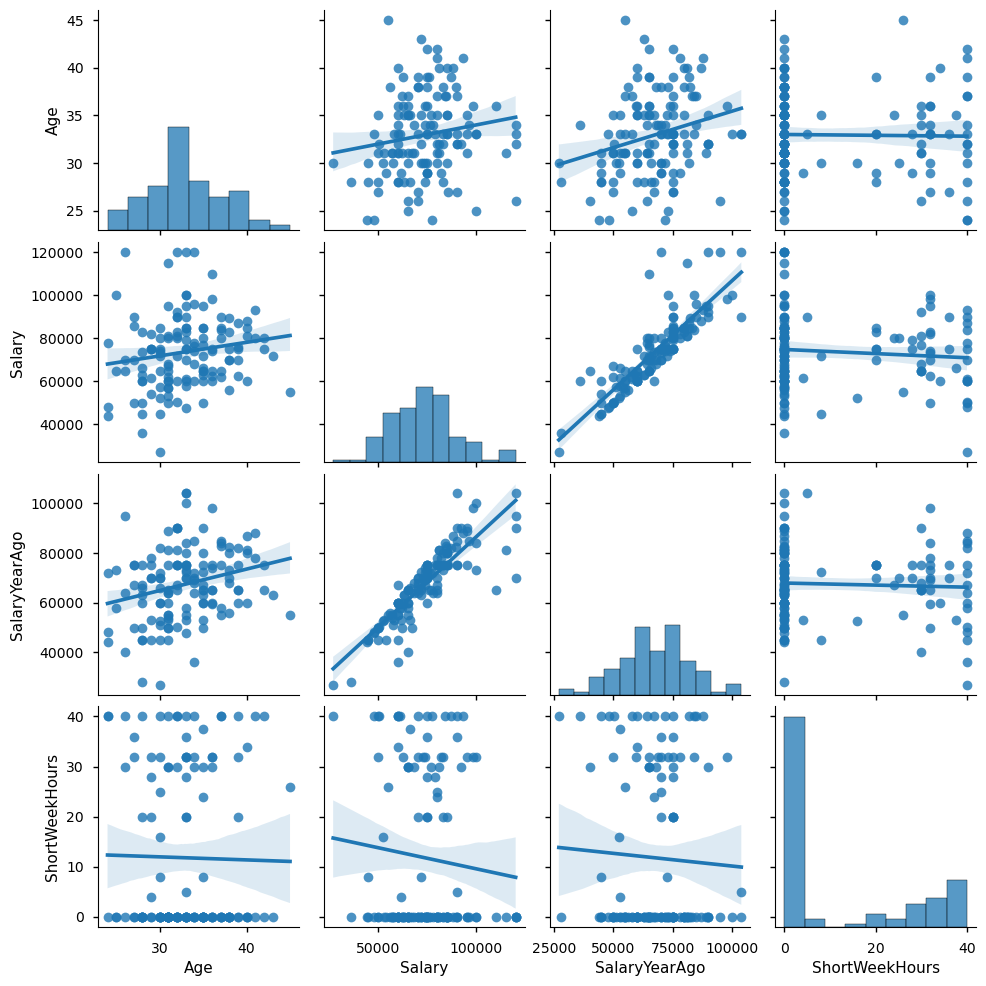

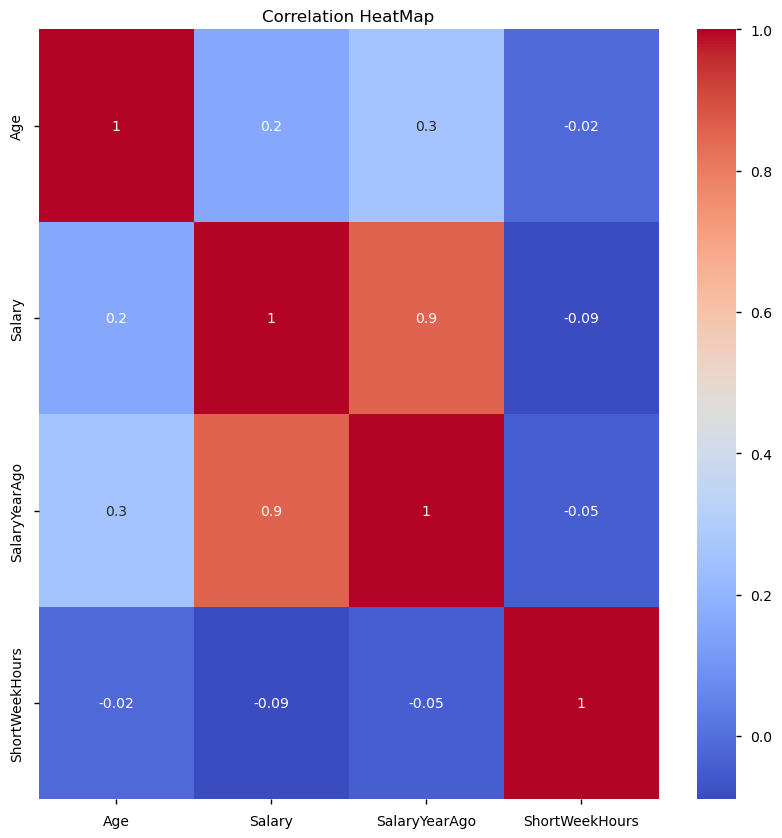

In [125]:
dfCorrelation = df.copy(deep=True)
# correlation graphs for numerical data
dfCorrelation.dropna(axis=0, inplace=True)

# remove outliers for every numerical column
for column in dfCorrelation.select_dtypes(include='number').columns:
    Q1 = dfCorrelation[column].quantile(0.25)
    Q3 = dfCorrelation[column].quantile(0.75)
    IQR = Q3 - Q1
    dfCorrelation = dfCorrelation[~((dfCorrelation[column] < (Q1 - 1.5 * IQR)) |(dfCorrelation[column] > (Q3 + 1.5 * IQR)))]

 # dfCorrelation['ExpierenceYears'].value_counts().sort_values(ascending=False)

print(dfCorrelation.isnull().sum().sum())
sns.pairplot(dfCorrelation, kind="reg")
plt.savefig(Path('./img/CorrelationPointPlot' + '.pdf'))
plt.show()
plt.close()

# create heatmap for correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(dfCorrelation.corr(), annot=True, fmt='.1g', cmap='coolwarm')
plt.title('Correlation HeatMap')
plt.savefig(Path('./img/CorrelationHeatMap' + '.pdf'))
plt.show()
plt.close()

### zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty.

In [126]:
dfremoval = df.copy()
''' dfremoval.dropna(axis=0, inplace=True) ''' # drop rows with NaN values
dfremoval.dropna(axis=1, inplace=True) # drop columns with NaN values
# remove outliers for every column
for column in dfremoval.columns:
    if dfremoval[column].dtype != 'object':
        Q1 = dfremoval[column].quantile(0.25)
        Q3 = dfremoval[column].quantile(0.75)
        IQR = Q3 - Q1
        dfremoval = dfremoval[~((dfremoval[column] < (Q1 - 1.5 * IQR)) |(dfremoval[column] > (Q3 + 1.5 * IQR)))]
print(dfremoval.shape)

print(dfremoval.isnull().sum().sum())
dfremoval.head(5)

(1173, 3)
0


,Timestamp,City,Salary
0,24/11/2020 11:14:15,Munich,80000.0
1,24/11/2020 11:14:16,Berlin,80000.0
3,24/11/2020 11:15:24,Berlin,54000.0
4,24/11/2020 11:15:46,Berlin,62000.0
5,24/11/2020 11:15:53,Berlin,76000.0


## proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).

In [127]:
# list columns with most NaN values
df.isnull().sum().sort_values(ascending=False)

ShortWeekHours                                            880
CovidSupport                                              791
StocksYearAgoSameCountry                                  639
Yearly bonus + stocks in EUR                              424
SalaryYearAgo                                             368
Other technologies/programming languages you use often    157
Your main technology / programming language               127
VacationDays                                               68
ExpierenceYearsGermany                                     32
Сontract duration                                          29
Age                                                        27
CompanyType                                                25
LostJobDueToCorona                                         20
CompanySize                                                18
Employment status                                          17
ExpierenceYears                                            16
Main lan

### Pocet objektu s vice chybejicimi hodnotami

In [128]:
# list rows with more than one NaN values
df[df.isnull().sum(axis=1) > 1]

,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,18/01/2021 09:51:30,38.0,Male,Berlin,Head of Engineering,18,8,Head,NaN,"Javascript / Typescript, SQL, Go, AWS, Google ...",90000.0,20000,90000.0,20000,26,Full-time employee,Unlimited contract,German,51-100,Product,No,NaN,NaN
1247,18/01/2021 11:50:02,34.0,Male,Zurich,Software Engineer,7,2,Senior,PHP,PHP,108500.0,NaN,90000.0,NaN,25,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0


In [129]:
def is_number_in_std_of_df_length(df, number):
    return number > df.shape[0] - 3 * df.shape[0] / 4 and number < df.shape[0] + 3 * df.shape[0] / 4

def is_number_in_std_of_df_len(df, number):
    return (number > df.mean() - 3 * df.std()) and (number < df.mean() + 3 * df.std())    
# list rows with more than ten NaN values

print(df[df.isnull().sum(axis=1) > 10].any(axis=1).count() / len(df)*100, '% of the rows have more than 10 NaN values')
print('is value in standard deviations ?', is_number_in_std_of_df_length(df,df[df.isnull().sum(axis=1) > 10].any(axis=1).count()))
df[df.isnull().sum(axis=1) > 10]


1.1971268954509178 % of the rows have more than 10 NaN values
is value in standard deviations ? False


,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
55,24/11/2020 11:33:08,NaN,Male,Berlin,Software Engineer,NaN,1,Senior,PHP,NaN,7.500000e+04,NaN,NaN,NaN,NaN,Full-time employee,NaN,English,NaN,NaN,No,0.0,NaN
281,24/11/2020 15:07:35,28.0,Male,Berlin,Frontend Developer,8,5,Senior,Javascript,NaN,6.800000e+04,NaN,NaN,NaN,NaN,Full-time employee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,24/11/2020 18:16:39,25.0,Male,Berlin,Backend Developer,5,0,Senior,Java,Python,6.000000e+04,5600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,24/11/2020 18:50:50,30.0,Male,Samara,Backend Developer,2,0,Middle,php,"PHP, Javascript / Typescript, SQL",1.200000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,25/11/2020 03:27:34,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,25/11/2020 10:58:13,NaN,Male,Berlin,Software Engineer,15,NaN,Senior,Java,NaN,1.500000e+05,150000,NaN,NaN,NaN,Full-time employee,NaN,English,NaN,NaN,No,NaN,NaN
678,25/11/2020 19:02:20,21.0,Female,Cologne,Mobile Developer,2,2,Middle,NaN,NaN,5.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,25/11/2020 21:10:17,37.0,Male,Stuttgart,Backend Developer,NaN,NaN,Senior,C#,NaN,7.000000e+04,NaN,NaN,NaN,30,Full-time employee,Unlimited contract,NaN,NaN,NaN,No,NaN,NaN
714,25/11/2020 23:20:02,32.0,Male,Paris,DevOps,12,3,Senior,NaN,NaN,6.200000e+04,NaN,NaN,NaN,NaN,Full-time employee,NaN,English,1000+,NaN,NaN,NaN,NaN
770,26/11/2020 14:37:05,27.0,Male,Bucharest,QA Engineer,1,0,Junior,Javascript,Javascript / Typescript,1.100000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#rows with NaN values that are greater than 1
counter = 0
for i in range(len(df.index)) :
    if df.iloc[i].isnull().sum() > 1 :
        counter += 1
counter


954

In [131]:
#pocet vsech NaN hodnot

df.isnull().sum().sum()


3682

# 3. Připravte 2 varianty datové sady vhodné pro dolovací algoritmy. Můžete uvažovat dolovací úlohu uvedenou u datové sady nebo navrhnout vlastní dolovací úlohy. V případě vlastní dolovací úlohy ji specifikujte v dokumentaci. V rámci přípravy datové sady proveďte následující kroky:

## Data Cleaning with autofill


In [132]:
# fill NaN values by backfill
dfAutofill = df.copy()
dfAutofill.fillna(method='backfill', downcast='infer', inplace=True)

dfAutofill.drop_duplicates()
print(dfAutofill.shape)

# show 5 rows of dataframe

dfAutofill.head(5)

(1253, 23)


,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
0,24/11/2020 11:14:15,26,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,0.0,600
1,24/11/2020 11:14:16,26,Male,Berlin,Backend Developer,7,4,Senior,Ruby,"Javascript / Typescript, Docker",80000.0,120000,82000,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,600
2,24/11/2020 11:14:21,29,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,0.0,600
3,24/11/2020 11:15:24,28,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,".NET, SQL, AWS, Docker",54000.0,5000,62000,5000,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,0.0,600
4,24/11/2020 11:15:46,37,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,5000,62000,5000,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,600


In [133]:
# cheching for NaN values DataFrame

print(dfAutofill.isnull().sum().sum())
df.isnull().sum().sum()

0


3682

In [134]:
dfAutofill = df.copy()
dfAutofill.fillna(dfAutofill.mode().iloc[0], inplace=True)
dfAutofill.head(5)

,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,0.0,0
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,Javascript / Typescript,80000.0,0,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,0.0,0
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,Javascript / Typescript,54000.0,0,65000.0,0,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,0.0,0
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0,62000.0,0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0


In [135]:
dfAutofill.isnull().sum().sum()

0

## Dataclean for droping NaN values

In [136]:
# drop columns with too many NaN values
dfAutofill = df.copy()
#dfAutofill.dropna(axis=1, inplace=True)
dfAutofill.dropna(axis=0, inplace=True)

print(dfAutofill.isnull().sum().sum())
dfAutofill.head(5)


0


,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
35,24/11/2020 11:28:14,33.0,Male,Berlin,Data Scientist,5,4,Lead,Python,"Python, R, Google Cloud, Docker",150000.0,80000,81000.0,4000,24,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,1
141,24/11/2020 12:09:03,34.0,Male,Munich,Cloud Architect,10,4,Senior,"Azure, SAP","SAP / ABAP, AWS, Google Cloud, Azure, Kubernet...",120000.0,40000,70000.0,30000,30,Full-time employee,Unlimited contract,English,1000+,Cloud,No,0.0,1000
221,24/11/2020 13:33:08,32.0,Male,Stuttgart,QA Engineer,9,9,Senior,Java,"R, SQL, Perl, Docker",60000.0,4700,67000.0,5000,30,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency,No,40.0,50
225,24/11/2020 13:37:57,24.0,Male,Boeblingen,C/C++/Java developer,0.8,0.8,Junior,Java,C/C++,48000.0,101,48000.0,101,30,Full-time employee,Unlimited contract,English,11-50,Product,No,40.0,250
276,24/11/2020 14:58:11,38.0,Male,Munich,Backend Developer,12,12,Senior,Java,"PHP, Javascript / Typescript, SQL",70000.0,1500,68000.0,1500,30,Full-time employee,Unlimited contract,German,101-1000,Telecommunications,No,0.0,675


## Vypořádejte se s odlehlými hodnotami, jsou-li v datové sadě přítomny.
### Outliers removal

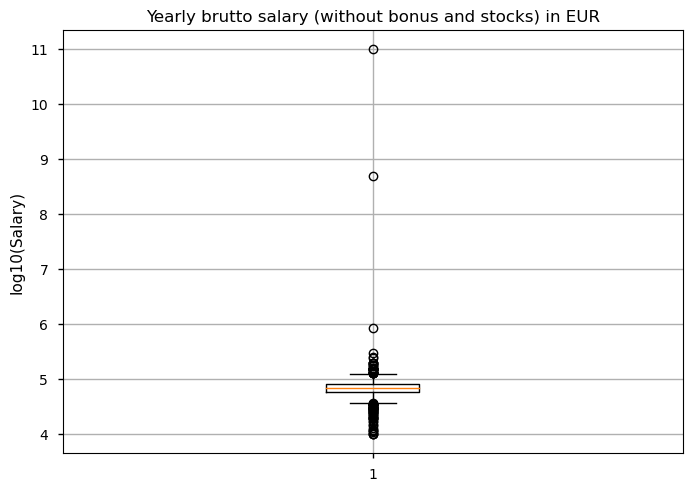

(1173, 23)


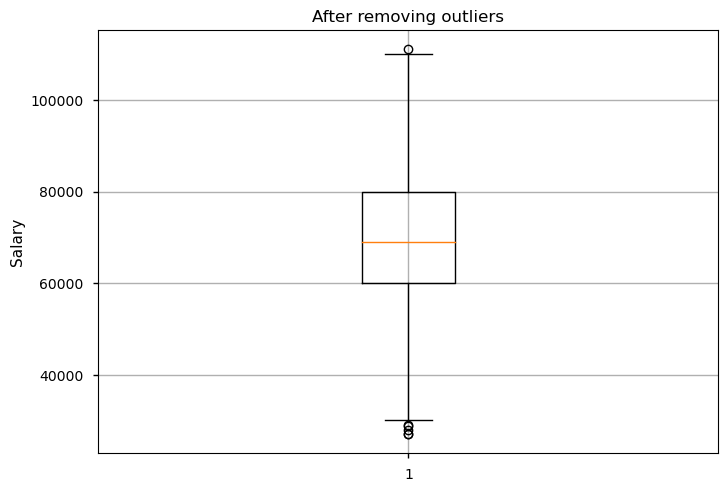

In [137]:
dfIQRRemoval = df.copy()

# check for outliers
plt.boxplot(np.log10(dfIQRRemoval['Salary']))
plt.title('Yearly brutto salary (without bonus and stocks) in EUR')
plt.ylabel('log10(Salary)')
plt.savefig(Path('./img/BoxPlotSalaryLog10' + '.pdf'))
plt.grid()
plt.show()

# IQR for salary

Q1 = dfIQRRemoval['Salary'].quantile(0.25)
Q3 = dfIQRRemoval['Salary'].quantile(0.75)
IQR = Q3 - Q1

# remove outliers

dfIQRRemoval = dfIQRRemoval[~((dfIQRRemoval['Salary'] < (Q1 - 1.5 * IQR)) |(dfIQRRemoval['Salary'] > (Q3 + 1.5 * IQR)))]
print(dfIQRRemoval.shape)


plt.boxplot(dfIQRRemoval['Salary'])
plt.title('After removing outliers')
plt.ylabel('Salary')
plt.savefig(Path('./img/BoxPlotSalaryWithoutOutliers' + '.pdf'))
plt.grid()
plt.show()


In [138]:
# outliers removal for every column

dfremoval = df.copy()
dfremoval.dropna(axis=0, inplace=True) # drop rows with NaN values
''' dfremoval.dropna(axis=1, inplace=True) ''' # drop columns with NaN values
# remove outliers for every column
for column in dfremoval.columns:
    if dfremoval[column].dtype != 'object':
        Q1 = dfremoval[column].quantile(0.25)
        Q3 = dfremoval[column].quantile(0.75)
        IQR = Q3 - Q1
        dfremoval = dfremoval[~((dfremoval[column] < (Q1 - 1.5 * IQR)) |(dfremoval[column] > (Q3 + 1.5 * IQR)))]
print(dfremoval.shape)

print(dfremoval.isnull().sum().sum())
dfremoval.head(5)

(131, 23)
0


,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
141,24/11/2020 12:09:03,34.0,Male,Munich,Cloud Architect,10,4,Senior,"Azure, SAP","SAP / ABAP, AWS, Google Cloud, Azure, Kubernet...",120000.0,40000,70000.0,30000,30,Full-time employee,Unlimited contract,English,1000+,Cloud,No,0.0,1000
221,24/11/2020 13:33:08,32.0,Male,Stuttgart,QA Engineer,9,9,Senior,Java,"R, SQL, Perl, Docker",60000.0,4700,67000.0,5000,30,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency,No,40.0,50
225,24/11/2020 13:37:57,24.0,Male,Boeblingen,C/C++/Java developer,0.8,0.8,Junior,Java,C/C++,48000.0,101,48000.0,101,30,Full-time employee,Unlimited contract,English,11-50,Product,No,40.0,250
276,24/11/2020 14:58:11,38.0,Male,Munich,Backend Developer,12,12,Senior,Java,"PHP, Javascript / Typescript, SQL",70000.0,1500,68000.0,1500,30,Full-time employee,Unlimited contract,German,101-1000,Telecommunications,No,0.0,675
289,24/11/2020 15:22:10,32.0,Male,Berlin,Software Engineer,9,5,Lead,JavaScript,"Javascript / Typescript, Ruby, AWS, Kubernetes...",90000.0,0,75000.0,0,25,Full-time employee,Unlimited contract,English,101-1000,Product,Have been a freelancer at the beginning of year,0.0,No


### outliers removal of DFZscore

In [139]:
# z-score for outliers removal

dfzscore = df.copy()
dfzscore.dropna(axis=0, inplace=True) # drop rows with NaN values
''' dfzscore.dropna(axis=1, inplace=True) ''' # drop columns with NaN values
# zscore for every column
for column in dfzscore.columns:
    if dfzscore[column].dtype != 'object':
        dfzscore = dfzscore[(np.abs(stats.zscore(dfzscore[column])) < 3)]
print(dfzscore.shape)

print(dfzscore.isnull().sum().sum())
dfzscore.head(5)

# z-score for outliers removal

(137, 23)
0


,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
141,24/11/2020 12:09:03,34.0,Male,Munich,Cloud Architect,10,4,Senior,"Azure, SAP","SAP / ABAP, AWS, Google Cloud, Azure, Kubernet...",120000.0,40000,70000.0,30000,30,Full-time employee,Unlimited contract,English,1000+,Cloud,No,0.0,1000
221,24/11/2020 13:33:08,32.0,Male,Stuttgart,QA Engineer,9,9,Senior,Java,"R, SQL, Perl, Docker",60000.0,4700,67000.0,5000,30,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency,No,40.0,50
225,24/11/2020 13:37:57,24.0,Male,Boeblingen,C/C++/Java developer,0.8,0.8,Junior,Java,C/C++,48000.0,101,48000.0,101,30,Full-time employee,Unlimited contract,English,11-50,Product,No,40.0,250
276,24/11/2020 14:58:11,38.0,Male,Munich,Backend Developer,12,12,Senior,Java,"PHP, Javascript / Typescript, SQL",70000.0,1500,68000.0,1500,30,Full-time employee,Unlimited contract,German,101-1000,Telecommunications,No,0.0,675
289,24/11/2020 15:22:10,32.0,Male,Berlin,Software Engineer,9,5,Lead,JavaScript,"Javascript / Typescript, Ruby, AWS, Kubernetes...",90000.0,0,75000.0,0,25,Full-time employee,Unlimited contract,English,101-1000,Product,Have been a freelancer at the beginning of year,0.0,No


## Odstraňte z datové sady atributy, které jsou pro danou dolovací úlohu irelevantní.


In [140]:
# remove irrelevant columns in dataframe
dfIrrelevant = df.copy()
dfIrrelevant.drop(['Timestamp','Other technologies/programming languages you use often','LostJobDueToCorona',
'ShortWeekHours',
'CovidSupport',
'Main language at work','ExpierenceYearsGermany','Gender'], axis=1, inplace=True)
dfIrrelevant

# TODO drop values based on correlation

,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
0,26.0,Munich,Software Engineer,5,Senior,TypeScript,80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,51-100,Product
1,26.0,Berlin,Backend Developer,7,Senior,Ruby,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,101-1000,Product
2,29.0,Berlin,Software Engineer,12,Lead,Javascript / Typescript,120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,101-1000,Product
3,28.0,Berlin,Frontend Developer,4,Junior,Javascript,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,51-100,Startup
4,37.0,Berlin,Backend Developer,17,Senior,C# .NET,62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Berlin,Backend Developer,9,Senior,Java,70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,51-100,Product
1249,33.0,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,consumer analysis,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,1000+,Product
1250,39.0,Munich,IT Operations Manager,15,Lead,PHP,110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,101-1000,eCommerce
1251,26.0,Saarbrücken,Frontend Developer,7,Middle,JavaScript,38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,101-1000,Product


## Convert Data

In [141]:
# convert to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df['Timestamp'].head(5))

0   2020-11-24 11:14:15
1   2020-11-24 11:14:16
2   2020-11-24 11:14:21
3   2020-11-24 11:15:24
4   2020-11-24 11:15:46
Name: Timestamp, dtype: datetime64[ns]


# 3. - FINAL PREPARATION for data mining

In [142]:
# 1. remove irrelevant columns in dataframe
dfPreprocessed = df.copy()
attributesToDrop = ['Timestamp','Other technologies/programming languages you use often','LostJobDueToCorona',
'ShortWeekHours',
'CovidSupport',
'Main language at work','ExpierenceYearsGermany','Gender']
dfPreprocessed.drop(attributesToDrop, axis=1, inplace=True)
print('Dropped',len(attributesToDrop), 'useless attributes')

# 2. deal with missing values
origNumOfRecrds = dfPreprocessed.shape[0]
dfDropped = dfPreprocessed.dropna(axis=0, inplace=False)
assert dfDropped.isnull().sum().sum() == 0, 'Dropping records with null values failed'
print('1. Dropped '+str(origNumOfRecrds-dfDropped.shape[0])+'/'+str(origNumOfRecrds)+' records due to missing values, resulting in '+str(dfDropped.shape[0])+' values to be parsed')
dfReplaced = dfPreprocessed.fillna(dfPreprocessed.mode().iloc[0], inplace=False)
assert dfReplaced.isnull().sum().sum() == 0, 'Replacing missing values with most common ones failed'
print('2. Missing values replaced with most common values for each column')


Dropped 8 useless attributes
1. Dropped 724/1253 records due to missing values, resulting in 529 values to be parsed
2. Missing values replaced with most common values for each column


## numerical to categorical

In [143]:
print('Dropped-missing version:')

# 3. remove outliers for every column
for column in dfDropped.columns:
    if dfDropped[column].dtype != 'object':
        Q1 = dfDropped[column].quantile(0.25)
        Q3 = dfDropped[column].quantile(0.75)
        IQR = Q3 - Q1
        dfDropped = dfDropped[~((dfDropped[column] < (Q1 - 1.5 * IQR)) |(dfDropped[column] > (Q3 + 1.5 * IQR)))]

# 4. discretize numerical to categorical
numericalCols = [
    'Age',
    'ExpierenceYears',
    'Salary',
    'Yearly bonus + stocks in EUR',
    'SalaryYearAgo',
    'StocksYearAgoSameCountry',
    'VacationDays'
]
dfDroppedCategorical = dfDropped[:]
for colName in numericalCols:
  dfDroppedCategorical[colName] = pd.to_numeric(dfDroppedCategorical[colName], errors='coerce') # convert to numeric
  dfDroppedCategorical.dropna(axis=0, inplace=True) # remove non-numeric
  dfDroppedCategorical[colName] = pd.qcut(dfDroppedCategorical[colName], 4, duplicates='drop') # discretize
dfDroppedCategorical.head(5)

Dropped-missing version:


,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
0,"(21.999, 29.0]",Munich,Software Engineer,"(-0.001, 5.0]",Senior,TypeScript,"(70000.0, 80000.0]","(-0.001, 5000.0]","(65000.0, 75000.0]","(5000.0, 31500.0]","(29.0, 30.0]",Full-time employee,Unlimited contract,51-100,Product
5,"(29.0, 32.0]",Berlin,DevOps,"(-0.001, 5.0]",Senior,"AWS, GCP, Python,K8s","(70000.0, 80000.0]","(-0.001, 5000.0]","(75000.0, 105000.0]","(-0.001, 5000.0]","(29.0, 30.0]",Full-time employee,Unlimited contract,11-50,Startup
15,"(29.0, 32.0]",Wolfsburg,Backend Developer,"(-0.001, 5.0]",Senior,Kotlin,"(70000.0, 80000.0]","(-0.001, 5000.0]","(65000.0, 75000.0]","(-0.001, 5000.0]","(2.999, 27.0]",Full-time employee,Unlimited contract,101-1000,Consulting / Agency
19,"(32.0, 36.0]",Berlin,Mobile Developer,"(8.0, 12.0]",Lead,kotlin,"(70000.0, 80000.0]","(17000.0, 200000.0]","(65000.0, 75000.0]","(31500.0, 115000.0]","(27.0, 29.0]",Full-time employee,Unlimited contract,101-1000,Product
25,"(36.0, 46.0]",Berlin,Team Lead,"(12.0, 30.0]",Lead,iOS,"(70000.0, 80000.0]","(-0.001, 5000.0]","(75000.0, 105000.0]","(-0.001, 5000.0]","(27.0, 29.0]",Full-time employee,Unlimited contract,101-1000,Product


In [144]:
print('Replaced-with-most-common version:')

# 3. remove outliers for every column
for column in dfReplaced.columns:
    if dfReplaced[column].dtype != 'object':
        Q1 = dfReplaced[column].quantile(0.25)
        Q3 = dfReplaced[column].quantile(0.75)
        IQR = Q3 - Q1
        dfReplaced = dfReplaced[~((dfReplaced[column] < (Q1 - 1.5 * IQR)) |(dfReplaced[column] > (Q3 + 1.5 * IQR)))]

dfReplacedCategorical = dfReplaced[:]
for colName in numericalCols:
  dfReplacedCategorical[colName] = pd.to_numeric(dfReplacedCategorical[colName], errors='coerce') # convert to numeric
  dfReplacedCategorical.dropna(axis=0, inplace=True) # remove non-numeric
  dfReplacedCategorical[colName] = pd.qcut(dfReplacedCategorical[colName], 4, duplicates='drop') # discretize
dfReplacedCategorical.head(5)

Replaced-with-most-common version:


,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
0,"(20.999, 29.0]",Munich,Software Engineer,"(-0.001, 5.0]",Senior,TypeScript,"(78000.0, 111111.0]","(-0.001, 7937.5]","(70000.0, 85000.0]","(3000.0, 122000.0]","(29.0, 30.0]",Full-time employee,Unlimited contract,51-100,Product
1,"(20.999, 29.0]",Berlin,Backend Developer,"(5.0, 8.0]",Senior,Ruby,"(78000.0, 111111.0]","(-0.001, 7937.5]","(70000.0, 85000.0]","(3000.0, 122000.0]","(27.0, 29.0]",Full-time employee,Unlimited contract,101-1000,Product
3,"(20.999, 29.0]",Berlin,Frontend Developer,"(-0.001, 5.0]",Junior,Javascript,"(26999.999, 60000.0]","(-0.001, 7937.5]","(60000.0, 65000.0]","(-0.001, 3000.0]","(2.999, 27.0]",Full-time employee,Unlimited contract,51-100,Startup
4,"(35.0, 44.0]",Berlin,Backend Developer,"(11.0, 28.0]",Senior,C# .NET,"(60000.0, 70000.0]","(-0.001, 7937.5]","(60000.0, 65000.0]","(-0.001, 3000.0]","(27.0, 29.0]",Full-time employee,Unlimited contract,101-1000,Product
5,"(29.0, 32.0]",Berlin,DevOps,"(-0.001, 5.0]",Senior,"AWS, GCP, Python,K8s","(70000.0, 78000.0]","(-0.001, 7937.5]","(70000.0, 85000.0]","(3000.0, 122000.0]","(29.0, 30.0]",Full-time employee,Unlimited contract,11-50,Startup


In [145]:
print(dfReplacedCategorical.info())
dfReplacedCategorical.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 1248
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Age                                          986 non-null    category
 1   City                                         986 non-null    object  
 2   Position                                     986 non-null    object  
 3   ExpierenceYears                              986 non-null    category
 4   SeniorityLevel                               986 non-null    object  
 5   Your main technology / programming language  986 non-null    object  
 6   Salary                                       986 non-null    category
 7   Yearly bonus + stocks in EUR                 986 non-null    category
 8   SalaryYearAgo                                986 non-null    category
 9   StocksYearAgoSameCountry                     986 non-null    cat

,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
count,986,986,986,986,986,986,986,986,986,986,986,986,986,986,986
unique,4,82,102,4,12,202,4,2,4,2,4,6,2,5,49
top,"(20.999, 29.0]",Berlin,Software Engineer,"(-0.001, 5.0]",Senior,Java,"(26999.999, 60000.0]","(-0.001, 7937.5]","(60000.0, 65000.0]","(-0.001, 3000.0]","(29.0, 30.0]",Full-time employee,Unlimited contract,1000+,Product
freq,296,562,303,291,489,252,288,740,432,741,454,973,953,351,631


In [146]:
print(dfDroppedCategorical.info())
dfDroppedCategorical.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Age                                          468 non-null    category
 1   City                                         468 non-null    object  
 2   Position                                     468 non-null    object  
 3   ExpierenceYears                              468 non-null    category
 4   SeniorityLevel                               468 non-null    object  
 5   Your main technology / programming language  468 non-null    object  
 6   Salary                                       468 non-null    category
 7   Yearly bonus + stocks in EUR                 468 non-null    category
 8   SalaryYearAgo                                468 non-null    category
 9   StocksYearAgoSameCountry                     468 non-null    cat

,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
count,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468
unique,4,65,69,4,10,130,4,3,4,3,4,4,2,5,33
top,"(32.0, 36.0]",Berlin,Software Engineer,"(-0.001, 5.0]",Senior,Java,"(70000.0, 80000.0]","(-0.001, 5000.0]","(65000.0, 75000.0]","(-0.001, 5000.0]","(29.0, 30.0]",Full-time employee,Unlimited contract,1000+,Product
freq,137,235,155,148,220,83,123,250,123,256,207,461,459,206,310


### Export data set

In [147]:
# export to csv
dfDropped.head(50).to_csv(Path('./MiningReadyData/CategoricalDropped.csv'), index=False, header=True, decimal=',', encoding='utf-8')
dfReplaced.head(50).to_csv(Path('./MiningReadyData/CategoricalReplaced.csv'), index=False, header=True, decimal=',', encoding='utf-8')

## categorical to numerical

In [148]:
print('Dropped-missing version (LabelEncoder):')

# convert numeric values stored as objects to numeric values
for colName in numericalCols:
  dfDropped[colName] = pd.to_numeric(dfDropped[colName], errors='coerce') # convert to numeric
  dfDropped.dropna(axis=0, inplace=True) # remove non-numeric

# convert kategorical to numerical
categorical_cols = dfDropped.select_dtypes(['object']).columns
dfDropped[categorical_cols] = dfDropped[categorical_cols].apply(lambda x: pd.factorize(x)[0])
dfDropped.head(5)

Dropped-missing version (LabelEncoder):


,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
0,26.0,0,0,5.0,0,0,80000.0,5000.0,75000.0,10000,30.0,0,0,0,0
5,32.0,1,1,5.0,0,1,76000.0,5000.0,76000.0,5000,30.0,0,0,1,1
15,31.0,2,2,5.0,0,2,75000.0,2000.0,75000.0,2000,25.0,0,0,2,2
19,34.0,1,3,11.0,1,3,80000.0,80000.0,75000.0,75000,28.0,0,0,2,0
25,38.0,1,4,18.0,1,4,80000.0,4000.0,80000.0,2000,28.0,0,0,2,0


In [149]:
print('Replaced-with-most-common version (LabelEncoder):')

# convert numeric values stored as objects to numeric values
for colName in numericalCols:
  dfReplaced[colName] = pd.to_numeric(dfReplaced[colName], errors='coerce') # convert to numeric
  dfReplaced.dropna(axis=0, inplace=True) # remove non-numeric

# convert kategorical to numerical
categorical_cols = dfReplaced.select_dtypes(['object']).columns
dfReplaced[categorical_cols] = dfReplaced[categorical_cols].apply(lambda x: pd.factorize(x)[0])
dfReplaced.head(5)

Replaced-with-most-common version (LabelEncoder):


,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
0,26.0,0,0,5.0,0,0,80000.0,5000.0,75000.0,10000,30.0,0,0,0,0
1,26.0,1,1,7.0,0,1,80000.0,0.0,82000.0,5000,28.0,0,0,1,0
3,28.0,1,2,4.0,1,2,54000.0,0.0,65000.0,0,24.0,0,0,0,1
4,37.0,1,1,17.0,0,3,62000.0,0.0,62000.0,0,29.0,0,0,1,0
5,32.0,1,3,5.0,0,4,76000.0,5000.0,76000.0,5000,30.0,0,0,2,1


In [150]:
print(dfDropped.info())
dfDropped.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age                                          468 non-null    float64
 1   City                                         468 non-null    int64  
 2   Position                                     468 non-null    int64  
 3   ExpierenceYears                              468 non-null    float64
 4   SeniorityLevel                               468 non-null    int64  
 5   Your main technology / programming language  468 non-null    int64  
 6   Salary                                       468 non-null    float64
 7   Yearly bonus + stocks in EUR                 468 non-null    float64
 8   SalaryYearAgo                                468 non-null    float64
 9   StocksYearAgoSameCountry                     468 non-null    int64  
 10  V

,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.00000,468.00000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,32.681624,6.711538,9.711538,8.915171,1.153846,30.529915,71070.82906,18034.05156,65493.771368,18988.497863,28.270299,0.025641,0.019231,2.183761,1.638889
std,4.807106,13.373250,15.243214,5.181528,1.455200,32.105773,15113.53467,28966.26546,14882.359495,27723.877648,3.060789,0.225240,0.137482,1.041121,5.053879
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27000.00000,0.00000,26000.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,0.000000,5.000000,0.000000,10.000000,60750.00000,0.00000,55000.000000,0.000000,27.000000,0.000000,0.000000,2.000000,0.000000
50%,32.000000,1.000000,2.000000,8.000000,1.000000,15.000000,70000.00000,5000.00000,65000.000000,5000.000000,29.000000,0.000000,0.000000,2.000000,0.000000
75%,36.000000,4.000000,11.000000,12.000000,2.000000,36.000000,80000.00000,17000.00000,75000.000000,31875.000000,30.000000,0.000000,0.000000,3.000000,1.000000
max,46.000000,64.000000,68.000000,30.000000,9.000000,129.000000,115000.00000,200000.00000,105000.000000,115000.000000,45.000000,3.000000,1.000000,4.000000,32.000000


In [151]:
print(dfReplaced.info())
dfReplaced.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 1248
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age                                          986 non-null    float64
 1   City                                         986 non-null    int64  
 2   Position                                     986 non-null    int64  
 3   ExpierenceYears                              986 non-null    float64
 4   SeniorityLevel                               986 non-null    int64  
 5   Your main technology / programming language  986 non-null    int64  
 6   Salary                                       986 non-null    float64
 7   Yearly bonus + stocks in EUR                 986 non-null    float64
 8   SalaryYearAgo                                986 non-null    float64
 9   StocksYearAgoSameCountry                     986 non-null    int64  
 10  V

,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,9.860000e+02,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,31.984787,6.096349,9.540568,8.504868,1.172414,35.731237,69163.754696,1.227383e+04,65288.666329,8898.900609,28.700304,0.026369,0.033469,1.842799,1.762677
std,4.477668,14.568091,18.739759,4.447781,1.388382,45.549168,13659.017448,4.345356e+04,8464.384181,21322.719365,11.089012,0.272820,0.179948,1.147336,6.380687
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27000.000000,0.000000e+00,45000.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,0.000000,5.000000,0.000000,9.000000,60000.000000,0.000000e+00,61000.000000,0.000000,27.000000,0.000000,0.000000,1.000000,0.000000
50%,32.000000,1.000000,2.000000,8.000000,1.000000,19.000000,70000.000000,0.000000e+00,65000.000000,0.000000,29.000000,0.000000,0.000000,2.000000,0.000000
75%,35.000000,1.000000,9.000000,11.000000,2.000000,36.000000,78000.000000,7.687500e+03,70000.000000,3000.000000,30.000000,0.000000,0.000000,3.000000,1.000000
max,44.000000,81.000000,101.000000,28.000000,11.000000,201.000000,111111.000000,1.150000e+06,85000.000000,122000.000000,365.000000,5.000000,1.000000,4.000000,48.000000


### Export Datasets

In [152]:
# export to csv
dfDropped.head(50).to_csv(Path('./MiningReadyData/NumericalDropped.csv'), index=False, header=True, decimal=',', encoding='utf-8')
dfReplaced.head(50).to_csv(Path('./MiningReadyData/NumericalReplaced.csv'), index=False, header=True, decimal=',', encoding='utf-8')

In [153]:
# convert jupyter notebook to pdf   
''' !jupyter nbconvert --to webpdf --allow-chromium-download ./main.ipynb '''

' !jupyter nbconvert --to webpdf --allow-chromium-download ./main.ipynb '

# BONUS - Prediciton of Salary from data set with data mining algorithms

## Numerical Mining Algorithms

In [154]:
# predict salary on mining-ready data  with prediction algorithms

dfPrediction = pd.read_csv(Path('./MiningReadyData/NumericalDropped.csv'), sep=',', decimal=',', encoding='utf-8')

# split data into train and test
from sklearn.model_selection import train_test_split
y = dfPrediction['Salary']
X = dfPrediction.drop(['Salary'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('\nLinear Regression')
print('Coefficients: ', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Cross validation score: %.2f' % cross_val_score(reg, X, y, cv=5).mean())

# decision tree
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('\nDecision Tree')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Cross validation score: %.2f' % cross_val_score(reg, X, y, cv=5).mean())

# random forest
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('\nRandom Forest')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Cross validation score: %.2f' % cross_val_score(reg, X, y, cv=5).mean())

# support vector machine
from sklearn.svm import SVR

reg = SVR(gamma='scale', C=1.0, epsilon=0.2)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('\nSupport Vector Machine')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Cross validation score: %.2f' % cross_val_score(reg, X, y, cv=5).mean())

# k-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('\nK-Nearest Neighbors')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Cross validation score: %.2f' % cross_val_score(reg, X, y, cv=5).mean())

# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('\nGradient Boosting')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Cross validation score: %.2f' % cross_val_score(reg, X, y, cv=5).mean())

# xgboost
from xgboost import XGBRegressor

reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('\nXGBoost')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Cross validation score: %.2f' % cross_val_score(reg, X, y, cv=5).mean())


Linear Regression
Coefficients:  [ 1.03833129e+02 -9.64827203e+02 -4.92018637e+02 -5.30231029e+01
 -5.70403798e+02  1.54829448e+02 -3.59907115e-02  7.94834148e-01
  8.99342340e-02  4.32139466e+00  0.00000000e+00  0.00000000e+00
 -1.33291495e+03  6.95190749e+02]
Mean squared error: 59122277.46
Coefficient of determination: 0.46
Cross validation score: 0.40

Decision Tree
Mean squared error: 65472360.00
Coefficient of determination: 0.40
Cross validation score: 0.19

Random Forest
Mean squared error: 43071270.76
Coefficient of determination: 0.61
Cross validation score: 0.54

Support Vector Machine
Mean squared error: 113966845.15
Coefficient of determination: -0.04
Cross validation score: -0.14

K-Nearest Neighbors
Mean squared error: 34849000.00
Coefficient of determination: 0.68
Cross validation score: 0.38

Gradient Boosting
Mean squared error: 60868747.84
Coefficient of determination: 0.44
Cross validation score: 0.50

XGBoost
Mean squared error: 72264349.50
Coefficient of determin

In [155]:
dfPrediction = pd.read_csv(Path('./MiningReadyData/NumericalReplaced.csv'), sep=',', decimal=',', encoding='utf-8')

# split data into train and test

y = dfPrediction['Salary']
X = dfPrediction.drop(['Salary','City'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('\nLinear Regression')
print('Coefficients: ', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Cross validation score: %.2f' % cross_val_score(reg, X, y, cv=5).mean())


Linear Regression
Coefficients:  [-3.08332774e+02 -7.53495673e+02 -4.64573491e+01  8.53763513e+01
  3.70795450e+02  4.09009094e-02  7.73226659e-01  6.87666750e-02
  1.15927907e+03  1.05051821e+04  1.05051821e+04  1.71069773e+03
 -1.57861626e+03]
Mean squared error: 130560385.04
Coefficient of determination: 0.39
Cross validation score: -0.00


## Categorical Mining Algorithms

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 367.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 367.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 367.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 367.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 367.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 353.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11, cost: 349.0
Run 2, iteration: 2/100, moves: 6, cost: 341.0
Run 2, iteration: 3/100, moves: 6, cost: 

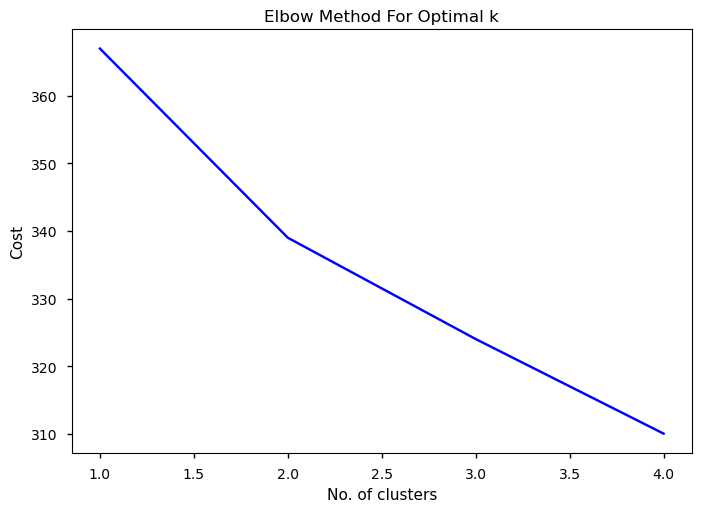

In [156]:
# prediction of salary from categorical data

dfPrediction = pd.read_csv(Path('./MiningReadyData/CategoricalReplaced.csv'), sep=',', decimal=',', encoding='utf-8')

# kmodes clustering

from kmodes.kmodes import KModes

cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=1)
    kmode.fit_predict(dfPrediction)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


In [157]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(dfPrediction)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 329.0
Run 1, iteration: 2/100, moves: 0, cost: 329.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16, cost: 328.0
Run 2, iteration: 2/100, moves: 1, cost: 328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6, cost: 332.0
Run 3, iteration: 2/100, moves: 7, cost: 331.0
Run 3, iteration: 3/100, moves: 0, cost: 331.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 15, cost: 324.0
Run 4, iteration: 2/100, moves: 7, cost: 324.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12, cost: 330.0
Run 5, iteration: 2/100, moves: 0, cost: 330.0
Best run was number 4


array([0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 0, 1, 1, 0], dtype=uint16)

In [158]:
dfPrediction.insert(0, 'Cluster', clusters, True)
dfPrediction.head()

,Cluster,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
0,0,26.0,Munich,Software Engineer,5,Senior,TypeScript,80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,51-100,Product
1,2,26.0,Berlin,Backend Developer,7,Senior,Ruby,80000.0,0,82000.0,5000,28,Full-time employee,Unlimited contract,101-1000,Product
2,1,28.0,Berlin,Frontend Developer,4,Junior,Javascript,54000.0,0,65000.0,0,24,Full-time employee,Unlimited contract,51-100,Startup
3,1,37.0,Berlin,Backend Developer,17,Senior,C# .NET,62000.0,0,62000.0,0,29,Full-time employee,Unlimited contract,101-1000,Product
4,0,32.0,Berlin,DevOps,5,Senior,"AWS, GCP, Python,K8s",76000.0,5000,76000.0,5000,30,Full-time employee,Unlimited contract,11-50,Startup



 
 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 439.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 400.0
Run 1, iteration: 2/100, moves: 0, cost: 400.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13, cost: 408.0
Run 2, iteration: 2/100, moves: 0, 

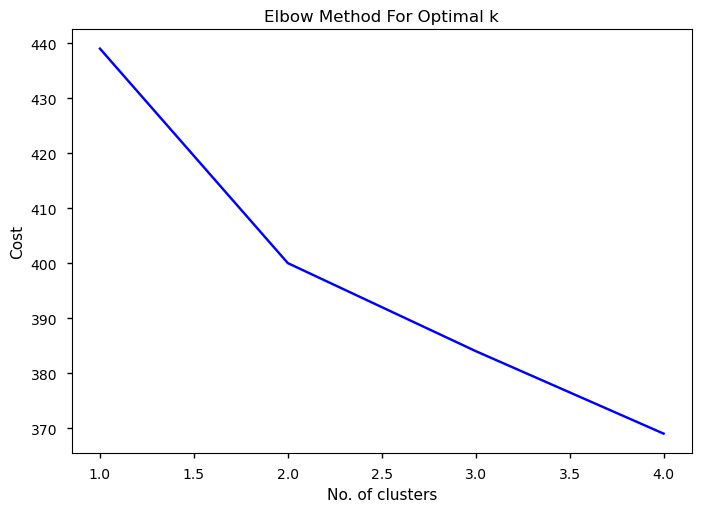

In [159]:
dfPrediction = pd.read_csv(Path('./MiningReadyData/CategoricalDropped.csv'), sep=',', decimal=',', encoding='utf-8')
print('\n \n \n')

cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=1)
    kmode.fit_predict(dfPrediction)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()    

In [160]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(dfPrediction)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11, cost: 382.0
Run 2, iteration: 2/100, moves: 3, cost: 381.0
Run 2, iteration: 3/100, moves: 0, cost: 381.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9, cost: 391.0
Run 3, iteration: 2/100, moves: 2, cost: 391.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8, cost: 390.0
Run 4, iteration: 2/100, moves: 2, cost: 388.0
Run 4, iteration: 3/100, moves: 0, cost: 388.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9, cost: 388.0
Run 5, iteration: 2/100, moves: 2, cost: 388.0
Best run was number 2


array([2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 0, 1], dtype=uint16)

In [161]:
dfPrediction.insert(0, 'Cluster', clusters, True)
dfPrediction.head()

,Cluster,Age,City,Position,ExpierenceYears,SeniorityLevel,Your main technology / programming language,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,CompanySize,CompanyType
0,2,26.0,Munich,Software Engineer,5,Senior,TypeScript,80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,51-100,Product
1,2,32.0,Berlin,DevOps,5,Senior,"AWS, GCP, Python,K8s",76000.0,5000,76000.0,5000,30,Full-time employee,Unlimited contract,11-50,Startup
2,0,31.0,Wolfsburg,Backend Developer,5,Senior,Kotlin,75000.0,2000,75000.0,2000,25,Full-time employee,Unlimited contract,101-1000,Consulting / Agency
3,0,34.0,Berlin,Mobile Developer,11,Lead,kotlin,80000.0,80000,75000.0,75000,28,Full-time employee,Unlimited contract,101-1000,Product
4,0,38.0,Berlin,Team Lead,18,Lead,iOS,80000.0,4000,80000.0,2000,28,Full-time employee,Unlimited contract,101-1000,Product
